
# Here we have our very clean data ready to use



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

In [15]:
import pandas as pd
# orders_cl.csv
url = "orders_cl.csv"
orders_cl = pd.read_csv(path, parse_dates= ['created_date'])

# orderlines_cl.csv
url = "orderlines_cl.csv'
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "products_cl.csv"
products_cl = pd.read_csv(path)

# brands_cl.csv
url = "brands_cl.csv"
brands = pd.read_csv(path)

In [16]:
# your code here
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

# This is how to get price categories from products_cl

In [17]:
products_cl.loc[:, 'price_category']= ['very low' if price <42.99 else  'low' if  42.99 < price < 100 else "medium" if price < 500  else 'high' if price < 1587.24 else 'very high' if price < 5000 else 'corrupted' for price in products_cl['price']]
products_cl

,sku,name,desc,price,in_stock,type,price_category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,low
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,low
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,low
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,very low
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,very low
...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,very low
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,low
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,low
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,low


# *** Here we created 34 products categories from product_cl, and a copy of the same table.

In [18]:
products_clean_2 = products_cl.copy()

In [19]:
# Create a new copy called products_clean_

# Reset the 'desc_category' column to empty strings before applying the new categorization rules
products_clean_2["desc_category"] = ""

# Apply categorization rules based on keywords found in either 'name' or 'desc'

# 1. Computers (make more specific)
products_clean_2.loc[products_clean_2["name"].str.contains("macbook|imac|laptop computer|notebook computer|desktop computer", case=False) |
                     products_clean_2["desc"].str.contains("macbook|imac|laptop computer|notebook computer|desktop computer", case=False), "desc_category"] = "Computers"
# 2. Mobile Devices
products_clean_2.loc[products_clean_2["name"].str.contains("iphone|smartphone|mobile|cell phone|android", case=False) |
                     products_clean_2["desc"].str.contains("iphone|smartphone|mobile|cell phone|android", case=False), "desc_category"] = "Mobile Devices"

# 3. Smartwatches
products_clean_2.loc[products_clean_2["name"].str.contains("smartwatch|watch|fitness tracker", case=False) |
                     products_clean_2["desc"].str.contains("smartwatch|watch|fitness tracker", case=False), "desc_category"] = "Smartwatches"

# 4. Tablets
products_clean_2.loc[products_clean_2["name"].str.contains("tablet|ipad|android tablet", case=False) |
                     products_clean_2["desc"].str.contains("tablet|ipad|android tablet", case=False), "desc_category"] = "Tablets"

# 5. Monitors
products_clean_2.loc[products_clean_2["name"].str.contains("monitor|display|screen|lcd|led", case=False) |
                     products_clean_2["desc"].str.contains("monitor|display|screen|lcd|led", case=False), "desc_category"] = "Monitors"

# 6. Keyboards
products_clean_2.loc[products_clean_2["name"].str.contains("keyboard|keypad", case=False) |
                     products_clean_2["desc"].str.contains("keyboard|keypad", case=False), "desc_category"] = "Keyboards"

# 7. Mice
products_clean_2.loc[products_clean_2["name"].str.contains("mouse|trackpad", case=False) |
                     products_clean_2["desc"].str.contains("mouse|trackpad", case=False), "desc_category"] = "Mice"

# 8. Storage Devices
products_clean_2.loc[products_clean_2["name"].str.contains("nas|external drive|storage|HDD|ssd|hard drive|flash drive", case=False) |
                     products_clean_2["desc"].str.contains("nas|external drive|storage|HDD|ssd|hard drive|flash drive", case=False), "desc_category"] = "Storage Devices"

# 9. Memory (RAM)
products_clean_2.loc[products_clean_2["name"].str.contains("memory|ram|ddr4|ddr3", case=False) |
                     products_clean_2["desc"].str.contains("memory|ram|ddr4|ddr3", case=False), "desc_category"] = "Memory"

# 10. Processors (CPUs)
products_clean_2.loc[products_clean_2["name"].str.contains("cpu|processor|intel|amd", case=False) |
                     products_clean_2["desc"].str.contains("cpu|processor|intel|amd", case=False), "desc_category"] = "Processors"

# 11. Graphics Cards (GPUs)
products_clean_2.loc[products_clean_2["name"].str.contains("gpu|graphics card|nvidia|amd", case=False) |
                     products_clean_2["desc"].str.contains("gpu|graphics card|nvidia|amd", case=False), "desc_category"] = "Graphics Cards"

# 12. Power Supplies (remove generic 'adapter')
products_clean_2.loc[products_clean_2["name"].str.contains("power supply|psu|power brick", case=False) |
                     products_clean_2["desc"].str.contains("power supply|psu|power brick", case=False), "desc_category"] = "Power Supplies"

# 13. Motherboards
products_clean_2.loc[products_clean_2["name"].str.contains("motherboard|mainboard", case=False) |
                     products_clean_2["desc"].str.contains("motherboard|mainboard", case=False), "desc_category"] = "Motherboards"

# 14. Cooling Systems
products_clean_2.loc[products_clean_2["name"].str.contains("fan|cooling|heatsink|liquid cooling|cooler", case=False) |
                     products_clean_2["desc"].str.contains("fan|cooling|heatsink|liquid cooling|cooler", case=False), "desc_category"] = "Cooling Systems"

# 15. Cases (e.g., PC cases)
products_clean_2.loc[products_clean_2["name"].str.contains("pc case|computer case|chassis", case=False) |
                     products_clean_2["desc"].str.contains("pc case|computer case|chassis", case=False), "desc_category"] = "Cases"

# 16. Docking Stations
products_clean_2.loc[products_clean_2["name"].str.contains("docking station|dock", case=False) |
                     products_clean_2["desc"].str.contains("docking station|dock", case=False), "desc_category"] = "Docking Stations"

# 17. Cables, Chargers & Adapters
products_clean_2.loc[products_clean_2["name"].str.contains("cable|charger|adapter|sensor|power cable", case=False) |
                     products_clean_2["desc"].str.contains("cable|charger|adapter|sensor|power cable", case=False), "desc_category"] = "Cables Chargers & Adapters"

# 18. Audio Devices
products_clean_2.loc[products_clean_2["name"].str.contains("headphones|earbuds|speaker|audio|bluetooth speaker", case=False) |
                     products_clean_2["desc"].str.contains("headphones|earbuds|speaker|audio|bluetooth speaker", case=False), "desc_category"] = "Audio Devices"

# 19. Networking
products_clean_2.loc[products_clean_2["name"].str.contains("router|wifi|ethernet|network|switch", case=False) |
                     products_clean_2["desc"].str.contains("router|wifi|ethernet|network|switch", case=False), "desc_category"] = "Networking"

# 20. Printers
products_clean_2.loc[products_clean_2["name"].str.contains("printer|printer ink|laser printer", case=False) |
                     products_clean_2["desc"].str.contains("printer|printer ink|laser printer", case=False), "desc_category"] = "Printers"

# 21. Scanners
products_clean_2.loc[products_clean_2["name"].str.contains("scanner|document scanner", case=False) |
                     products_clean_2["desc"].str.contains("scanner|document scanner", case=False), "desc_category"] = "Scanners"

# 22. Projectors
products_clean_2.loc[products_clean_2["name"].str.contains("projector|projection", case=False) |
                     products_clean_2["desc"].str.contains("projector|projection", case=False), "desc_category"] = "Projectors"

# 23. Camera Accessories
products_clean_2.loc[products_clean_2["name"].str.contains("camera|lens|tripod|photography", case=False) |
                     products_clean_2["desc"].str.contains("camera|lens|tripod|photography", case=False), "desc_category"] = "Camera Accessories"

# 24-27. Cases (Phone, Tablet, Laptop)
products_clean_2.loc[products_clean_2["name"].str.contains("phone case|iphone case|smartphone case", case=False) |
                     products_clean_2["desc"].str.contains("phone case|iphone case|smartphone case", case=False), "desc_category"] = "Phone Cases"
products_clean_2.loc[products_clean_2["name"].str.contains("tablet case|ipad case", case=False) |
                     products_clean_2["desc"].str.contains("tablet case|ipad case", case=False), "desc_category"] = "Tablet Cases"
products_clean_2.loc[products_clean_2["name"].str.contains("laptop case|macbook case", case=False) |
                     products_clean_2["desc"].str.contains("laptop case|macbook case", case=False), "desc_category"] = "Laptop Cases"

# 28. Smart Home Devices
products_clean_2.loc[products_clean_2["name"].str.contains("smart home|home assistant|smart speaker|alexa|google home", case=False) |
                     products_clean_2["desc"].str.contains("smart home|home assistant|smart speaker|alexa|google home", case=False), "desc_category"] = "Smart Home Devices"

# 29. Software & Licenses
products_clean_2.loc[products_clean_2["name"].str.contains("software|license|antivirus|operating system", case=False) |
                     products_clean_2["desc"].str.contains("software|license|antivirus|operating system", case=False), "desc_category"] = "Software & Licenses"

# 30. Gaming Accessories
products_clean_2.loc[products_clean_2["name"].str.contains("gaming|controller|joystick|gamepad", case=False) |
                     products_clean_2["desc"].str.contains("gaming|controller|joystick|gamepad", case=False), "desc_category"] = "Gaming Accessories"

# 31. Security Devices
products_clean_2.loc[products_clean_2["name"].str.contains("security camera|surveillance|alarm|motion sensor", case=False) |
                     products_clean_2["desc"].str.contains("security camera|surveillance|alarm|motion sensor", case=False), "desc_category"] = "Security Devices"

# 32. Server Equipment
products_clean_2.loc[products_clean_2["name"].str.contains("server|rack|enterprise storage|data center", case=False) |
                     products_clean_2["desc"].str.contains("server|rack|enterprise storage|data center", case=False), "desc_category"] = "Server Equipment"

# 33. VR/AR Devices
products_clean_2.loc[products_clean_2["name"].str.contains("vr|virtual reality|ar|augmented reality|oculus|vive", case=False) |
                     products_clean_2["desc"].str.contains("vr|virtual reality|ar|augmented reality|oculus|vive", case=False), "desc_category"] = "VR/AR Devices"

# 34. Webcams
products_clean_2.loc[products_clean_2["name"].str.contains("webcam|web camera|streaming camera", case=False) |
                     products_clean_2["desc"].str.contains("webcam|web camera|streaming camera", case=False), "desc_category"] = "Webcams"


In [20]:
# Check for uncategorized products
uncategorized = products_clean_2[products_clean_2['desc_category'] == ""]
print(f"Number of uncategorized products: {len(uncategorized)}")

Number of uncategorized products: 343


In [21]:
products_clean_2

,sku,name,desc,price,in_stock,type,price_category,desc_category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,low,Computers
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,low,VR/AR Devices
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,low,Cables Chargers & Adapters
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,very low,Cables Chargers & Adapters
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,very low,Memory
...,...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,very low,Smartwatches
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,low,VR/AR Devices
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,low,VR/AR Devices
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,low,VR/AR Devices


# So moving forward our data frame that have both : PRICE CATEGORIES & PRODUCTS CATEGORIES is products_clean_2

In [22]:
products_clean_2

,sku,name,desc,price,in_stock,type,price_category,desc_category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,low,Computers
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,low,VR/AR Devices
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,low,Cables Chargers & Adapters
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,very low,Cables Chargers & Adapters
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,very low,Memory
...,...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,very low,Smartwatches
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,low,VR/AR Devices
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,low,VR/AR Devices
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,low,VR/AR Devices


# Now that we have our categories for price and products we are going to look for the discounts

# ALL this is just workaround to filter completed orders only and merge them with orderlines meanwhile keeping only orders that have values on orderlines

In [23]:
# Filter to completed orders
state_mask = orders_cl['state'] == 'Completed'
# Apply filter
orders_completed = orders_cl.loc[state_mask].copy()

In [24]:

# Get order ids of completed orders
completed_order_ids = orders_completed['order_id']

# Filter orderlines to just those completed orders. orderlines and orders have same ids
orderlines_state_mask = orderlines_cl['id_order'].isin(completed_order_ids)

# Apply filter
orderlines_completed = orderlines_cl.loc[orderlines_state_mask].copy()

In [25]:
# Looking for orderlines with no orders
set(orderlines_completed['id_order']) - set(orders_completed['order_id'])

set()

In [26]:

# Get collection of orders that are in the orderlines table
existing_orderlines = orderlines_completed['id_order'].copy()

# Filter to just orders in orderlines table
overalp_mask = orders_completed['order_id'].isin(existing_orderlines)

# Apply filter
orders_coherent = orders_completed.loc[overalp_mask].copy()

In [27]:
# Remove all orders and orderlines if any orderline's product is missing

# 1. Identify corrupted orderlines (missing their products)
# (Note: This could be done more concisely)

# Identify products we actually have information about
existing_products = products_cl['sku']
# Create new column to track the status of the orderline
orderlines_completed.loc[:, 'Corrupted'] = False
# Identify orderlines with existing products
products_there_mask = orderlines_completed['sku'].isin(existing_products)
# Label all orderlines with *missing* products corrupted
orderlines_completed.loc[~products_there_mask, 'Corrupted'] = True


# 2. Identify corrupted orders (with corrupted orderlines)

# Filter to corrupted orderlines
corrupted_mask = orderlines_completed['Corrupted']==True
# Identify which orders they are in
corrupted_orders = orderlines_completed.loc[corrupted_mask, 'id_order']


# 3. Filter our by corrupted orders

# Creating filters to remove corrupted orders from both data frame
corrupted_orders_mask = orders_coherent['order_id'].isin(corrupted_orders)
corrupted_orderlines_mask = orderlines_completed['id_order'].isin(corrupted_orders)
# Applying filters
orders_qu = orders_coherent.loc[~corrupted_orders_mask]
orderlines_qu = orderlines_completed.loc[~corrupted_orderlines_mask]

In [28]:
orders_qu_copy = orders_qu.copy()

In [29]:
orders_qu_copy['created_date']=pd.to_datetime(orders_qu_copy['created_date'])

# Here we have our COMPLETED orders without orders that has no value in orderlines

In [30]:
orders_qu_copy

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226544,527042,2018-03-14 11:47:50,18.98,Completed
226572,527070,2018-03-14 11:50:48,24.97,Completed
226576,527074,2018-03-14 11:51:42,24.97,Completed
226598,527096,2018-03-14 11:58:40,34.96,Completed


# Here we have our Orderlines without corrupted values

In [31]:
orderlines_qu

,id,id_order,product_id,product_quantity,sku,unit_price,date,Corrupted
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,False
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,False
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,False
15,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,False
21,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,False
...,...,...,...,...,...,...,...,...
215889,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,False
215906,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,False
215911,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,False
215932,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,False


# Here we calculated the unit_price_total to go get the discount

In [32]:
orderlines_com_copy= orderlines_completed.copy()

In [33]:
orderlines_com_copy.loc[:, 'unit_price_total'] = orderlines_com_copy['unit_price'] * orderlines_com_copy['product_quantity']

In [34]:
# Drop the 'Corrupted' column
orderlines_com_copy = orderlines_com_copy.drop(columns=['Corrupted'])
orderlines_com_copy

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
15,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
21,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49
...,...,...,...,...,...,...,...,...
215889,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,16.52
215906,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
215911,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
215932,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


# HERE we merged to get a data frame that have both price and unit_price_total to be able to calculate the discount

In [35]:
orderline_product= orderlines_com_copy.merge(products_clean_2, on='sku', how='left')
orderline_product

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,in_stock,type,price_category,desc_category
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1.00,12755395,low,Cables Chargers & Adapters
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0.00,5720,very low,VR/AR Devices
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1.00,13005399,low,VR/AR Devices
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0.00,1298,low,VR/AR Devices
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,0.00,11905404,medium,VR/AR Devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56709,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,0.00,13835403,very low,Computers
56710,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1.00,1230,very low,VR/AR Devices
56711,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1.00,1230,very low,VR/AR Devices
56712,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1.00,1230,very low,VR/AR Devices


# Here we have a Data Frame  with PRICE CATEGORIES , PRODUCT CATEGORIES , DATES & DISCOUNT

In [36]:
orderline_product= orderline_product.drop(['product_id' , 'type', 'in_stock', 'id'], axis=1).copy()

In [37]:
orderline_product.loc[:, 'discount']= orderline_product['price'] - orderline_product['unit_price']

In [38]:
orderline_product

,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,price_category,desc_category,discount
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,low,Cables Chargers & Adapters,13.50
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,very low,VR/AR Devices,3.96
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,low,VR/AR Devices,16.81
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,low,VR/AR Devices,16.09
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,medium,VR/AR Devices,157.50
...,...,...,...,...,...,...,...,...,...,...,...,...
56709,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,very low,Computers,8.47
56710,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01
56711,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01
56712,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01


# At this level we want to add brands to get insights on products names

In [39]:
orderline_product.loc[:, 'short'] = orderline_product['sku'].str[:3]
orderline_product

,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,price_category,desc_category,discount,short
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,low,Cables Chargers & Adapters,13.50,OWC
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,very low,VR/AR Devices,3.96,IOT
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,low,VR/AR Devices,16.81,APP
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,low,VR/AR Devices,16.09,CRU
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,medium,VR/AR Devices,157.50,PEB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56709,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,very low,Computers,8.47,TUC
56710,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01,APP
56711,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01,APP
56712,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01,APP


# At this point we are going to merge everything with Brands

In [40]:
#brands

In [41]:
super_merge = orderline_product.merge(brands, on ="short", how="left" )
super_merge

,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,price_category,desc_category,discount,short,long
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,low,Cables Chargers & Adapters,13.50,OWC,OWC
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,very low,VR/AR Devices,3.96,IOT,iOttie
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,low,VR/AR Devices,16.81,APP,Apple
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,low,VR/AR Devices,16.09,CRU,Crucial
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,medium,VR/AR Devices,157.50,PEB,Pebble
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56709,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,very low,Computers,8.47,TUC,Tucano
56710,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01,APP,Apple
56711,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01,APP,Apple
56712,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01,APP,Apple


# Here is our final output a data frame with : PRICE CATEGORIES , PRODUCTS CATEGORIES , DATES , DISCOUNT & BRANDS

In [42]:
eniac_II = super_merge.copy()

In [43]:
#eniac_II[;,'discount_percent']=
eniac_II.loc[:, 'discount_percent']= eniac_II['discount']/eniac_II['price']*100


In [44]:
eniac_II['discount_percent'] = (eniac_II['discount'] / eniac_II['price'] * 100).round(0).fillna(0).astype(int)

In [45]:
eniac_II.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56714 entries, 0 to 56713
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_order          56714 non-null  int64  
 1   product_quantity  56714 non-null  int64  
 2   sku               56714 non-null  object 
 3   unit_price        56714 non-null  float64
 4   date              56714 non-null  object 
 5   unit_price_total  56714 non-null  float64
 6   name              55320 non-null  object 
 7   desc              55320 non-null  object 
 8   price             55320 non-null  float64
 9   price_category    55320 non-null  object 
 10  desc_category     55320 non-null  object 
 11  discount          55320 non-null  float64
 12  short             56714 non-null  object 
 13  long              56676 non-null  object 
 14  discount_percent  56714 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 6.5+ MB


In [46]:
eniac_II

,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,price_category,desc_category,discount,short,long,discount_percent
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,low,Cables Chargers & Adapters,13.50,OWC,OWC,22
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,very low,VR/AR Devices,3.96,IOT,iOttie,17
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,low,VR/AR Devices,16.81,APP,Apple,19
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,low,VR/AR Devices,16.09,CRU,Crucial,21
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,medium,VR/AR Devices,157.50,PEB,Pebble,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56709,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,very low,Computers,8.47,TUC,Tucano,34
56710,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01,APP,Apple,60
56711,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01,APP,Apple,60
56712,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01,APP,Apple,60


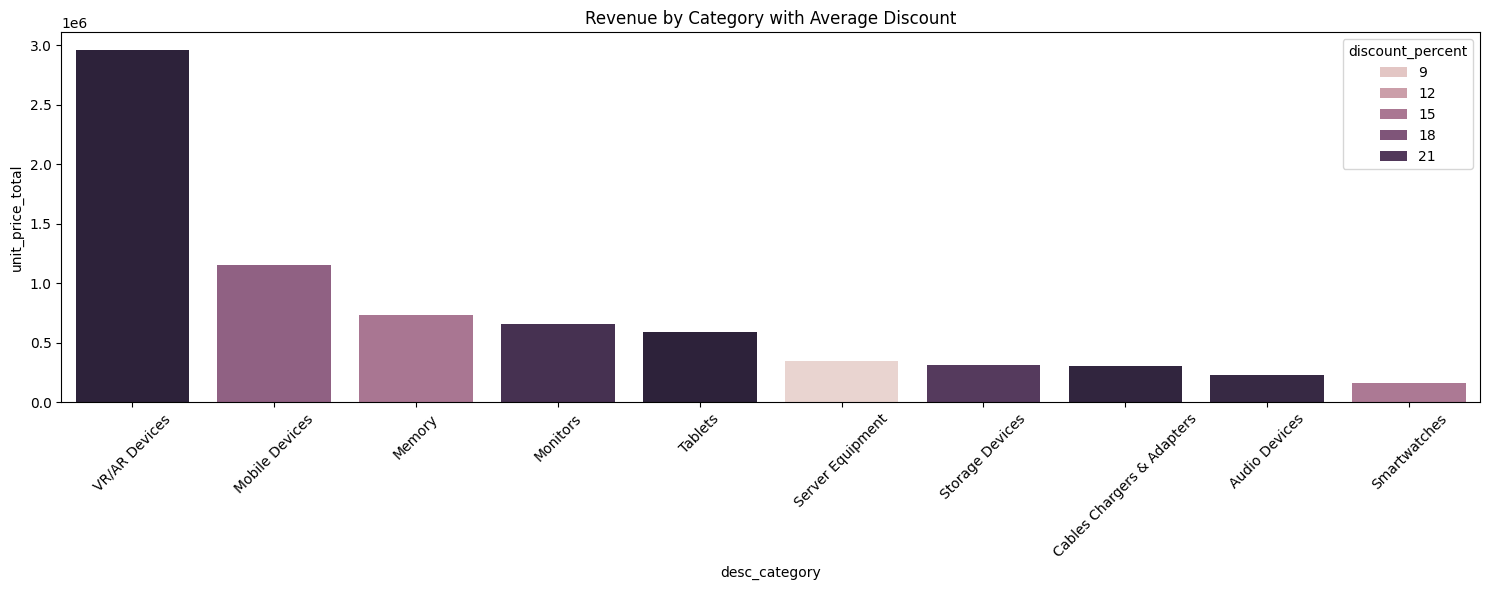

In [47]:
# Calculate average metrics by category
category_metrics = eniac_II.groupby('desc_category').agg({
    'unit_price_total': 'sum',
    'discount_percent': 'mean',
    'product_quantity': 'sum'
}).sort_values('unit_price_total', ascending=False).head(10)
# Create bar plot
plt.figure(figsize=(15, 6))
sns.barplot(data=category_metrics.reset_index(),
            x='desc_category',
            y='unit_price_total',
            hue='discount_percent')
plt.xticks(rotation=45)
plt.title('Revenue by Category with Average Discount')
plt.tight_layout()

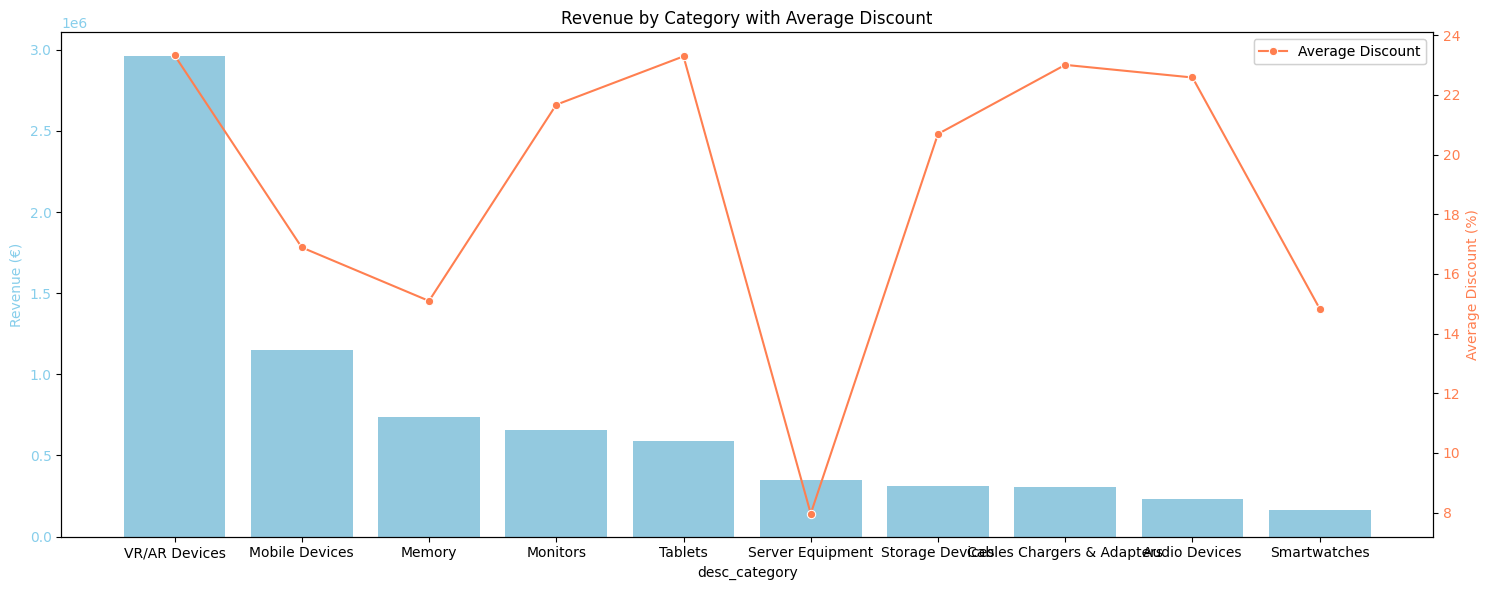

In [48]:
# Calculate average metrics by category
category_metrics = eniac_II.groupby('desc_category').agg({
    'unit_price_total': 'sum',
    'discount_percent': 'mean',
    'product_quantity': 'sum'
}).sort_values('unit_price_total', ascending=False).head(10)

# Create a bar plot with a line for average discount
fig, ax1 = plt.subplots(figsize=(15, 6))

# Bar plot for revenue
sns.barplot(data=category_metrics.reset_index(),
            x='desc_category',
            y='unit_price_total',
            ax=ax1,
            color='skyblue')  # Set a single color for bars
ax1.set_ylabel('Revenue (€)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for average discount
ax2 = ax1.twinx()
sns.lineplot(data=category_metrics.reset_index(),
            x='desc_category',
            y='discount_percent',
            ax=ax2,
            color='coral',
            marker='o',
            label='Average Discount')
ax2.set_ylabel('Average Discount (%)', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Customize the plot
plt.title('Revenue by Category with Average Discount')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')

# Combine legends (if needed)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# Let's start with the analysis!

# Revenue Impact

In [49]:
# 1. Group by product name and sum quantities sold and revenue
top_10_products_total = eniac_II.groupby('sku').agg(
    product_quantity=('product_quantity', 'sum'),  # Assign names to aggregated columns
    unit_price_total=('unit_price_total', 'sum')
).nlargest(10, 'product_quantity').reset_index()
# 2. Format the revenue column
top_10_products_total['unit_price_total'] = top_10_products_total['unit_price_total'].apply(lambda x: f"{x:.2f}€")
# 3. Display the results
print(top_10_products_total)

       sku  product_quantity unit_price_total
0  APP1190               965        52475.66€
1  APP0698               838         8344.82€
2  APP1922               563        90224.92€
3  WDT0183               505        69410.40€
4  APP0927               493         8411.93€
5  CRU0051               359        48469.87€
6  SAM0074               356        54175.02€
7  NTE0013               292         5309.00€
8  APP2446               271       104949.64€
9  CRU0050               262        22339.76€


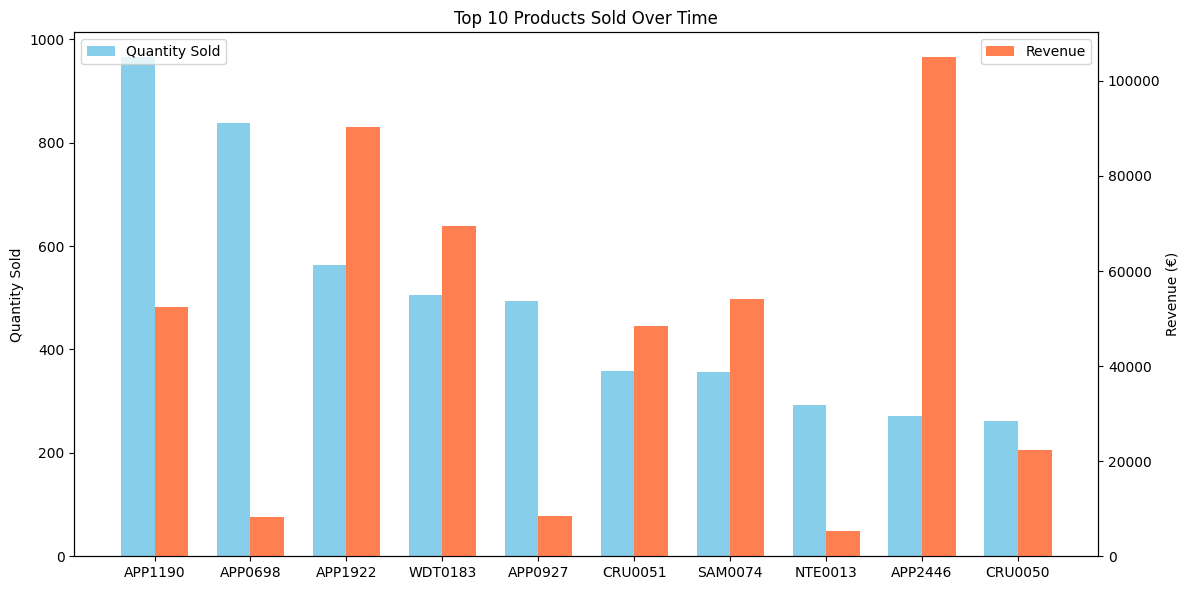

In [50]:
# 1. Group by product sku and sum quantities sold and revenue
top_10_products_total = eniac_II.groupby('sku').agg(
    product_quantity=('product_quantity', 'sum'),
    unit_price_total=('unit_price_total', 'sum')
).nlargest(10, 'product_quantity').reset_index()
# 2. Create the bar plot with separate bars
fig, ax1 = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed
# Bar width and positions
bar_width = 0.35
x_pos = np.arange(len(top_10_products_total))
# Quantity sold bars
ax1.bar(x_pos, top_10_products_total['product_quantity'], bar_width, color='skyblue', label='Quantity Sold')
# Revenue bars (on secondary y-axis)
ax2 = ax1.twinx()
ax2.bar(x_pos + bar_width, top_10_products_total['unit_price_total'], bar_width, color='coral', label='Revenue')
# 3. Customize the plot
plt.title('Top 10 Products Sold Over Time')
plt.xlabel('Product sku')
ax1.set_ylabel('Quantity Sold')
ax2.set_ylabel('Revenue (€)')
plt.xticks(x_pos + bar_width / 2, top_10_products_total['sku'], rotation=45, ha='right')  # Center x-axis labels
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


# Top 10 categories by quantity and revenue

In [51]:
top_10_categories_total = eniac_II.groupby('desc_category').agg(
    product_quantity=('product_quantity', 'sum'),
    unit_price_total=('unit_price_total', 'sum')
).nlargest(10, 'product_quantity').reset_index()

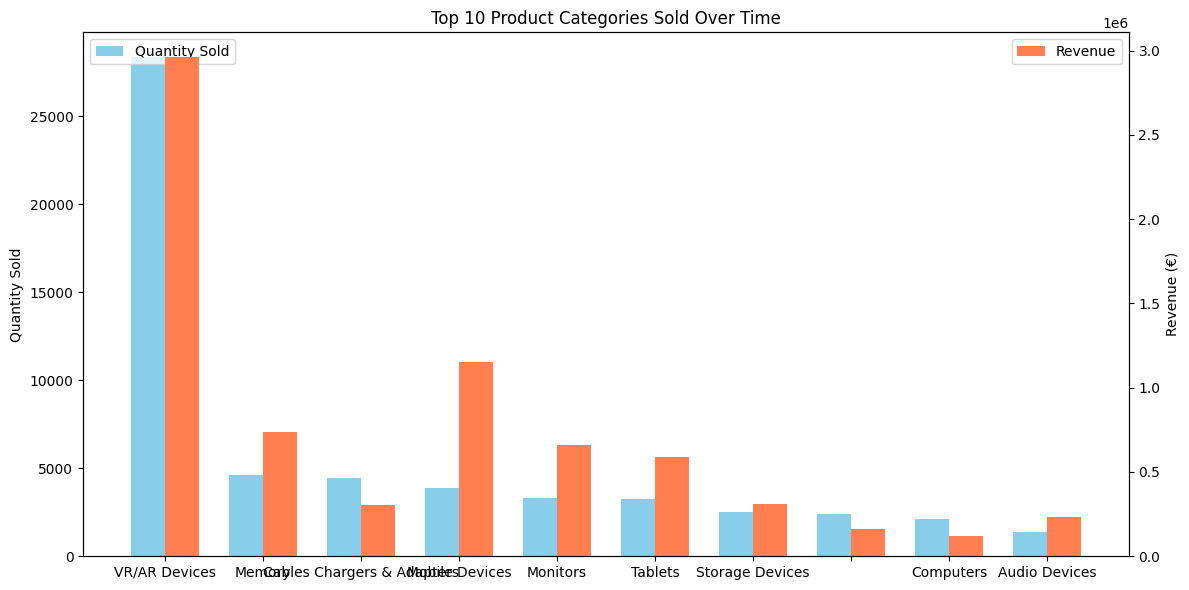

In [52]:
fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.35
x_pos = np.arange(len(top_10_categories_total))

ax1.bar(x_pos, top_10_categories_total['product_quantity'], bar_width, color='skyblue', label='Quantity Sold')
ax2 = ax1.twinx()
ax2.bar(x_pos + bar_width, top_10_categories_total['unit_price_total'], bar_width, color='coral', label='Revenue')

plt.title('Top 10 Product Categories Sold Over Time')
plt.xlabel('Product Category')
ax1.set_ylabel('Quantity Sold')
ax2.set_ylabel('Revenue (€)')
plt.xticks(x_pos + bar_width / 2, top_10_categories_total['desc_category'], rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

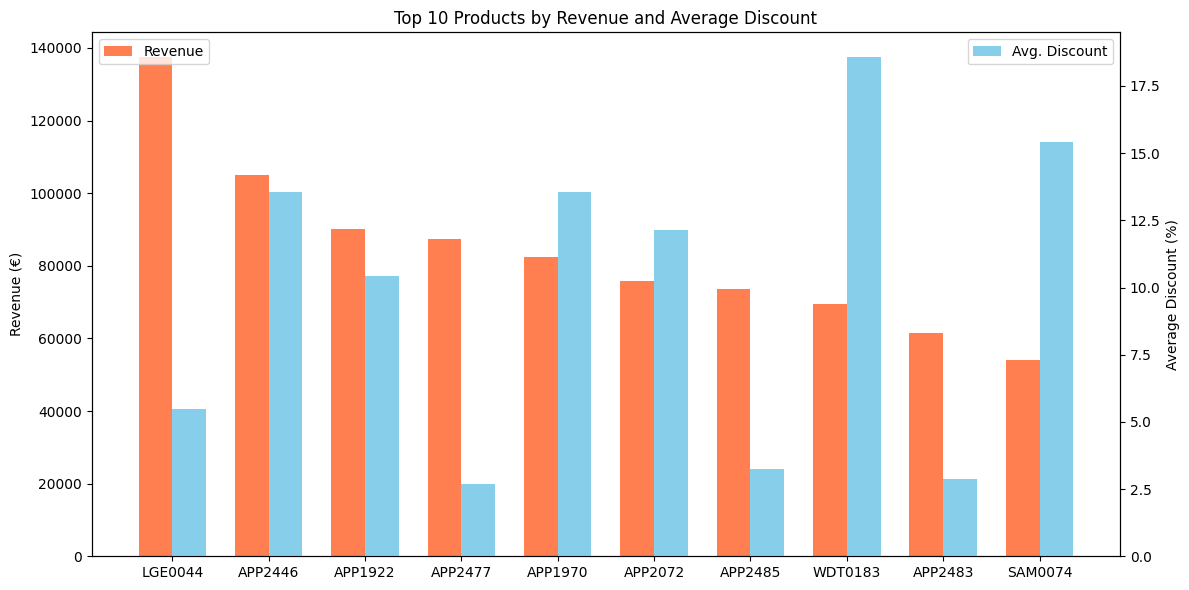

In [53]:
# 1. Group by product sku and calculate total revenue and average discount
top_10_revenue_products = eniac_II.groupby('sku').agg(
    unit_price_total=('unit_price_total', 'sum'),
    avg_discount=('discount_percent', 'mean')  # Calculate average discount
).nlargest(10, 'unit_price_total').reset_index()
# 2. Create the bar plot with separate bars
fig, ax1 = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed
# Bar width and positions
bar_width = 0.35
x_pos = np.arange(len(top_10_revenue_products))
# Revenue bars
ax1.bar(x_pos, top_10_revenue_products['unit_price_total'], bar_width, color='coral', label='Revenue')
# Average discount bars (on secondary y-axis)
ax2 = ax1.twinx()
ax2.bar(x_pos + bar_width, top_10_revenue_products['avg_discount'], bar_width, color='skyblue', label='Avg. Discount')
# 3. Customize the plot
plt.title('Top 10 Products by Revenue and Average Discount')
plt.xlabel('Product Name')
ax1.set_ylabel('Revenue (€)')
ax2.set_ylabel('Average Discount (%)')
plt.xticks(x_pos + bar_width / 2, top_10_revenue_products['sku'], rotation=45, ha='right')  # Center x-axis labels
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


# Top 10 categories (revenue and avg discount)

In [54]:
top_10_revenue_categories = eniac_II.groupby('desc_category').agg(
    unit_price_total=('unit_price_total', 'sum'),
    avg_discount=('discount_percent', 'mean')
).nlargest(10, 'unit_price_total').reset_index()

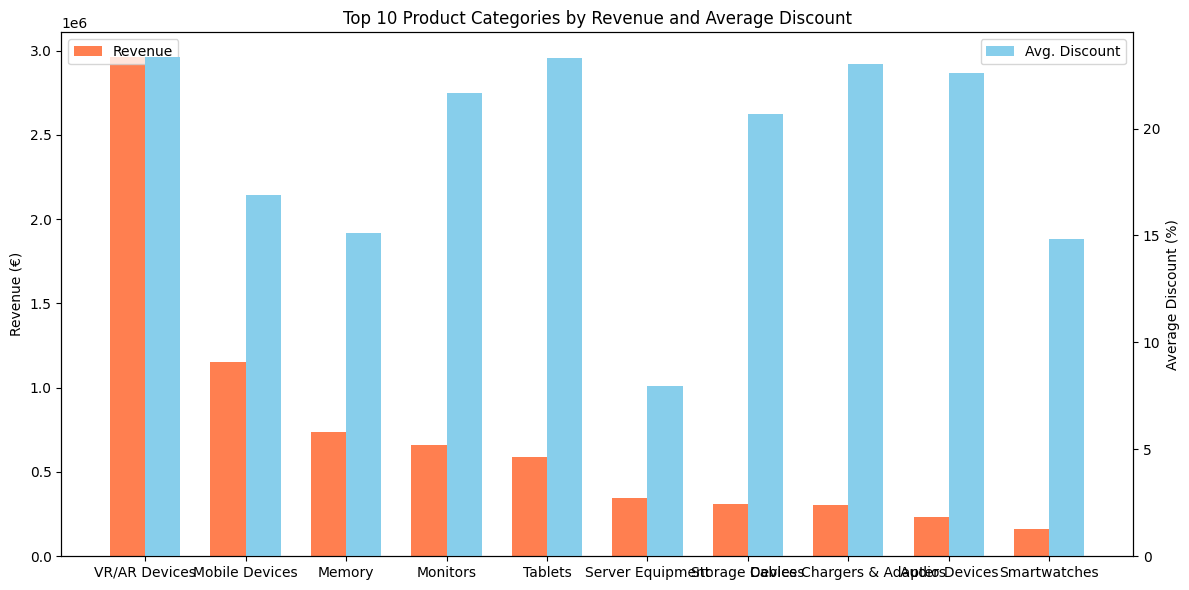

In [55]:
fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.35
x_pos = np.arange(len(top_10_revenue_categories))

ax1.bar(x_pos, top_10_revenue_categories['unit_price_total'], bar_width, color='coral', label='Revenue')
ax2 = ax1.twinx()
ax2.bar(x_pos + bar_width, top_10_revenue_categories['avg_discount'], bar_width, color='skyblue', label='Avg. Discount')

plt.title('Top 10 Product Categories by Revenue and Average Discount')
plt.xlabel('Product Category')
ax1.set_ylabel('Revenue (€)')
ax2.set_ylabel('Average Discount (%)')
plt.xticks(x_pos + bar_width / 2, top_10_revenue_categories['desc_category'], rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Top 5 categories and avg discount

Text(0, 0.5, 'Average Discount %')

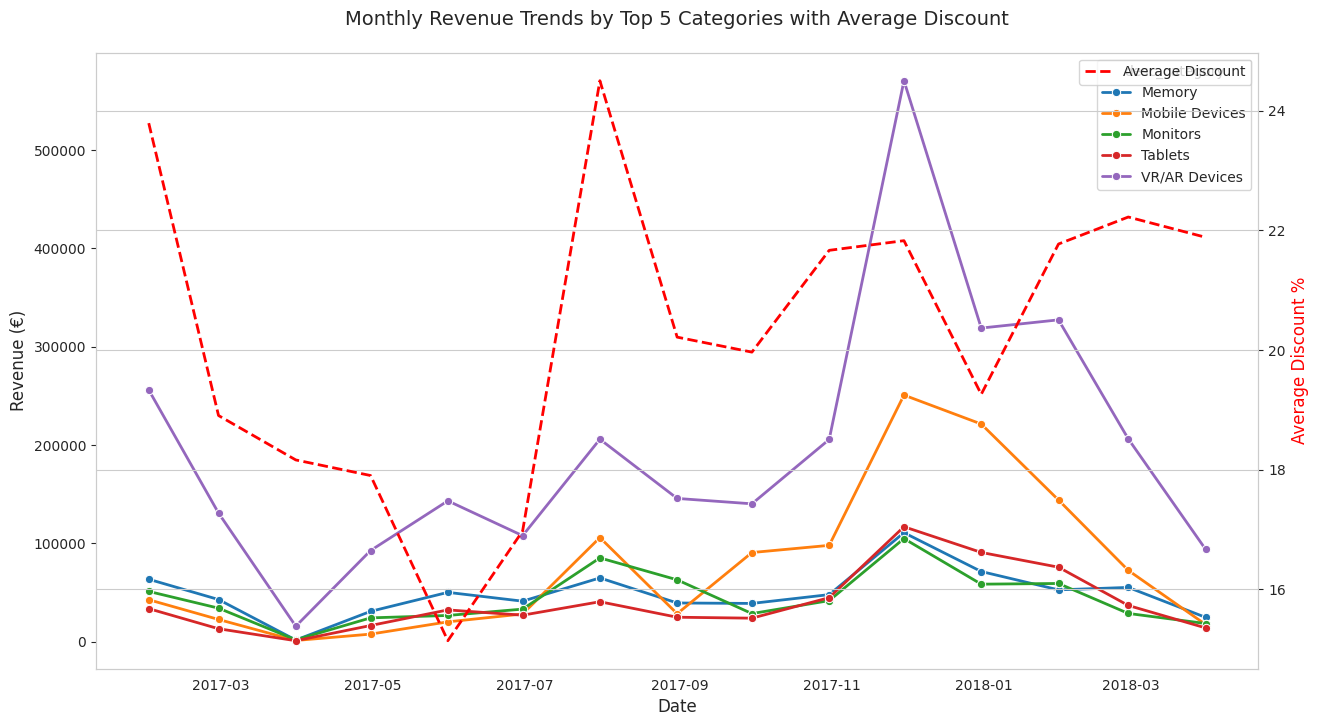

In [56]:
# Convert date to datetime if not already
eniac_II['date'] = pd.to_datetime(eniac_II['date'])
# Get top 5 categories by total revenue
top_5_categories = eniac_II.groupby('desc_category')['unit_price_total'].sum().nlargest(5).index
# Filter data for top 5 categories
top_5_data = eniac_II[eniac_II['desc_category'].isin(top_5_categories)]
# Create monthly aggregation for top 5 categories
monthly_category_revenue = top_5_data.groupby([
    pd.Grouper(key='date', freq='M'),
    'desc_category'
])['unit_price_total'].sum().reset_index()
# Calculate monthly average discount
monthly_avg_discount = eniac_II.groupby(
    pd.Grouper(key='date', freq='M')
)['discount_percent'].mean().reset_index()
# Create the line plot
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
# Plot revenue lines
ax1 = plt.gca()
sns.lineplot(data=monthly_category_revenue,
            x='date',
            y='unit_price_total',
            hue='desc_category',
            marker='o',
            linewidth=2,
            ax=ax1)
# Create second y-axis for discount
ax2 = ax1.twinx()
# Plot average discount line
sns.lineplot(data=monthly_avg_discount,
            x='date',
            y='discount_percent',
            color='red',
            linestyle='--',
            linewidth=2,
            label='Average Discount',
            ax=ax2)
# Customize the plot
ax1.set_title('')  # Remove title by setting it to an empty string
ax1.grid(False)  # Remove line grid by setting grid to False

# Customize the plot
ax1.set_title('Monthly Revenue Trends by Top 5 Categories with Average Discount', pad=20, fontsize=14)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Revenue (€)', fontsize=12)
ax2.set_ylabel('Average Discount %', fontsize=12, color='red')



mobile devices and discount

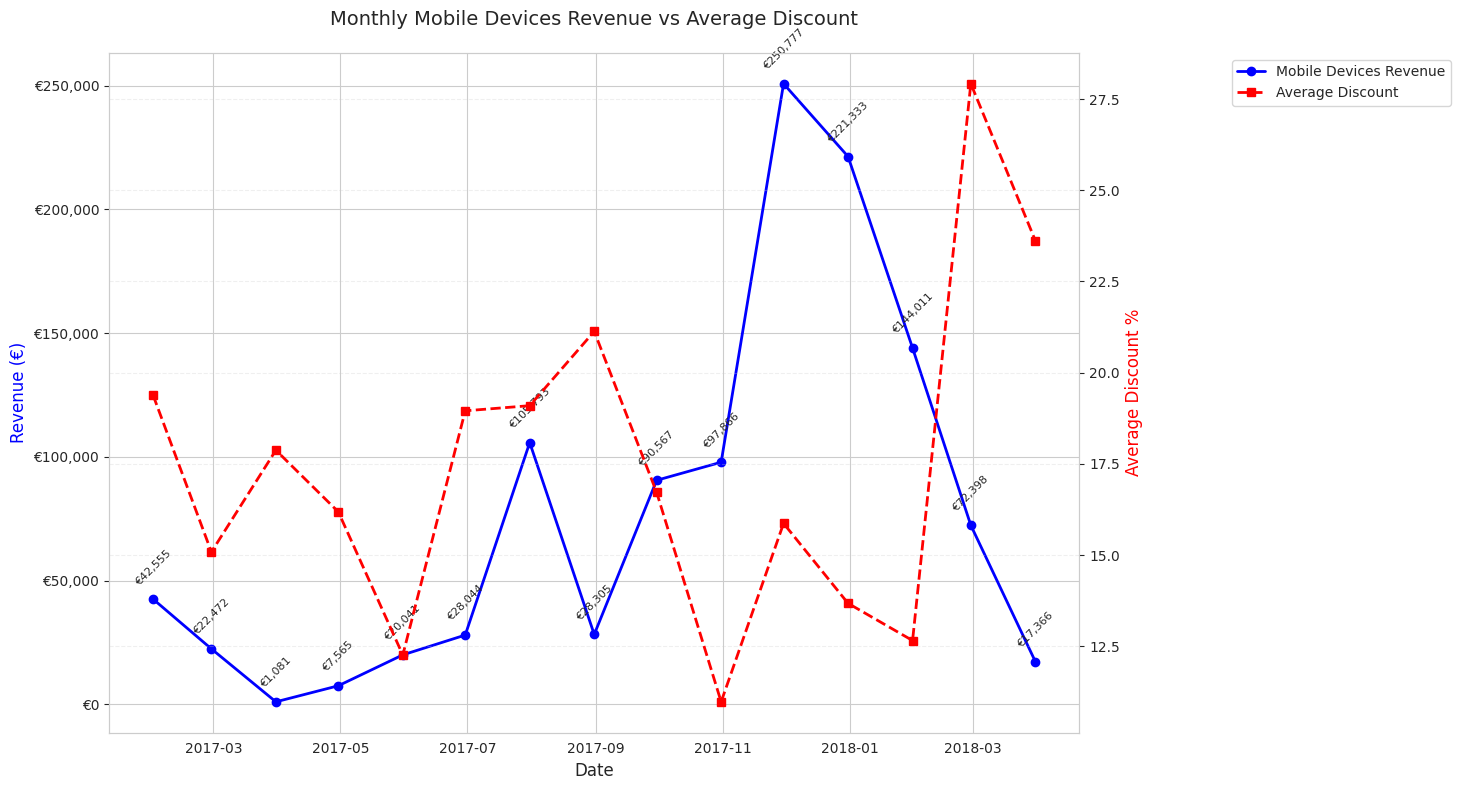


Mobile Devices Summary Statistics:
---------------------------------
Total Revenue: €1,150,177.06
Average Monthly Revenue: €76,678.47
Average Discount: 17.43%
Highest Revenue Month: November 2017
Lowest Revenue Month: March 2017


In [57]:

# Convert date to datetime if not already
eniac_II['date'] = pd.to_datetime(eniac_II['date'])

# Filter data for Mobile Devices
mobile_data = eniac_II[eniac_II['desc_category'] == 'Mobile Devices']

# Create monthly aggregation for Mobile Devices
monthly_mobile_revenue = mobile_data.groupby(
    pd.Grouper(key='date', freq='M')
)['unit_price_total'].sum().reset_index()

# Calculate monthly average discount
monthly_avg_discount = mobile_data.groupby(
    pd.Grouper(key='date', freq='M')
)['discount_percent'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")

# Plot revenue line
ax1 = plt.gca()
line1 = ax1.plot(monthly_mobile_revenue['date'],
                 monthly_mobile_revenue['unit_price_total'],
                 color='blue',
                 marker='o',
                 linewidth=2,
                 label='Mobile Devices Revenue')

# Create second y-axis for discount
ax2 = ax1.twinx()

# Plot average discount line
line2 = ax2.plot(monthly_avg_discount['date'],
                 monthly_avg_discount['discount_percent'],
                 color='red',
                 linestyle='--',
                 marker='s',
                 linewidth=2,
                 label='Average Discount')

# Customize the plot
ax1.set_title('Monthly Mobile Devices Revenue vs Average Discount', pad=20, fontsize=14)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Revenue (€)', color='blue', fontsize=12)
ax2.set_ylabel('Average Discount %', color='red', fontsize=12)

# Format y-axis labels
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# Add value labels
for i, row in monthly_mobile_revenue.iterrows():
    ax1.annotate(f'€{row["unit_price_total"]:,.0f}',
                 (row['date'], row['unit_price_total']),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=8,
                 rotation=45)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,
          loc='upper left',
          bbox_to_anchor=(1.15, 1))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nMobile Devices Summary Statistics:")
print("---------------------------------")
print(f"Total Revenue: €{monthly_mobile_revenue['unit_price_total'].sum():,.2f}")
print(f"Average Monthly Revenue: €{monthly_mobile_revenue['unit_price_total'].mean():,.2f}")
print(f"Average Discount: {monthly_avg_discount['discount_percent'].mean():.2f}%")
print(f"Highest Revenue Month: {monthly_mobile_revenue.loc[monthly_mobile_revenue['unit_price_total'].idxmax(), 'date'].strftime('%B %Y')}")
print(f"Lowest Revenue Month: {monthly_mobile_revenue.loc[monthly_mobile_revenue['unit_price_total'].idxmin(), 'date'].strftime('%B %Y')}")




adjusting the graph

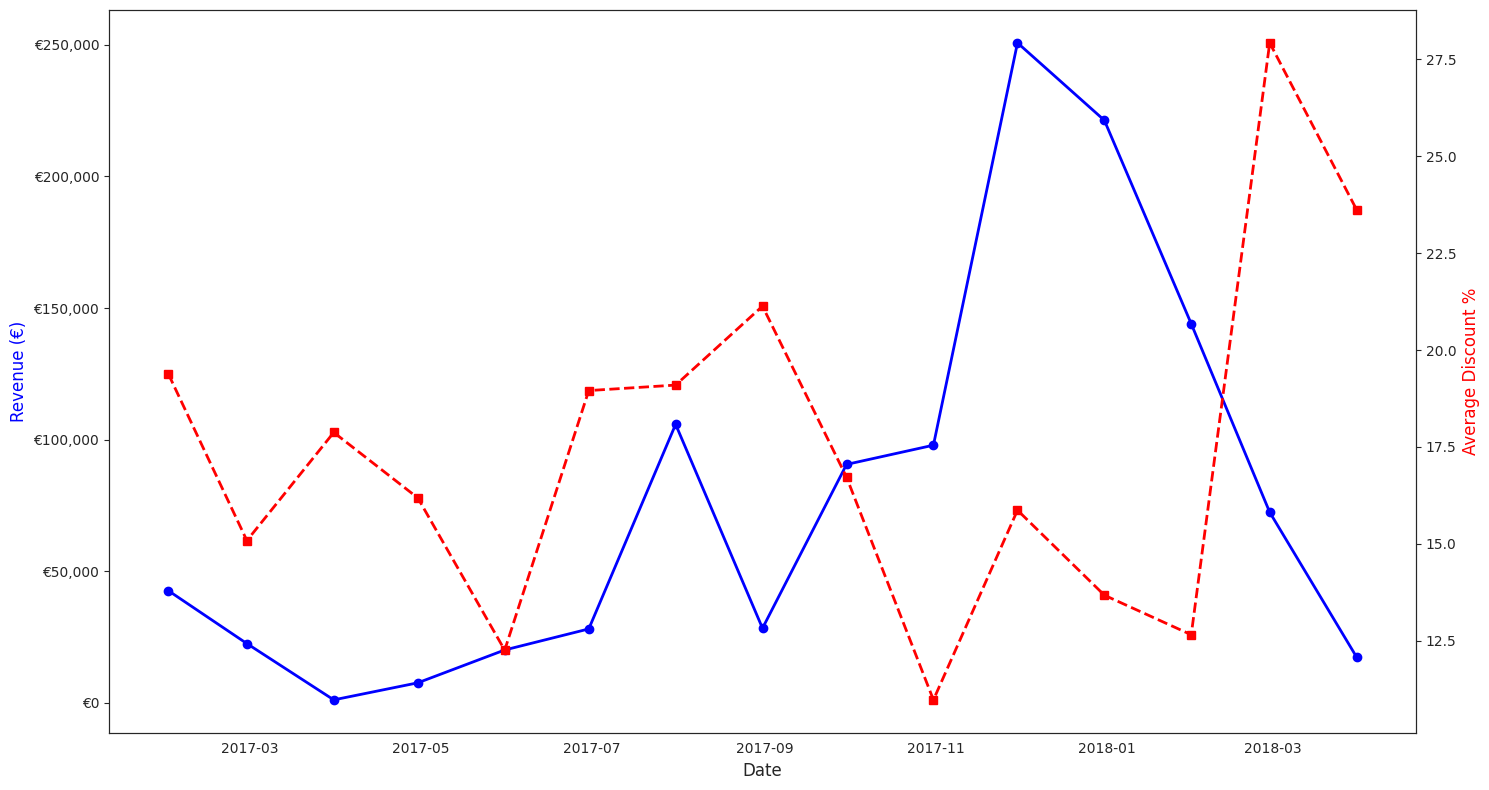

In [58]:
# Filter data for Mobile Devices
mobile_data = eniac_II[eniac_II['desc_category'] == 'Mobile Devices']

# Create monthly aggregation for Mobile Devices
monthly_mobile_revenue = mobile_data.groupby(
    pd.Grouper(key='date', freq='M')
)['unit_price_total'].sum().reset_index()

# Calculate monthly average discount
monthly_avg_discount = mobile_data.groupby(
    pd.Grouper(key='date', freq='M')
)['discount_percent'].mean().reset_index()


# Create the line plot
plt.figure(figsize=(15, 8))
sns.set_style("white")  # Changed to "white" for no grid

# Plot revenue line
ax1 = plt.gca()
line1 = ax1.plot(monthly_mobile_revenue['date'],
                 monthly_mobile_revenue['unit_price_total'],
                 color='blue',
                 marker='o',
                 linewidth=2,
                 label='Mobile Devices Revenue')

# Create second y-axis for discount
ax2 = ax1.twinx()

# Plot average discount line
line2 = ax2.plot(monthly_avg_discount['date'],
                 monthly_avg_discount['discount_percent'],
                 color='red',
                 linestyle='--',
                 marker='s',
                 linewidth=2,
                 label='Average Discount')

# Customize the plot
# ax1.set_title('Monthly Mobile Devices Revenue vs Average Discount', pad=20, fontsize=14)  # Removed title
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Revenue (€)', color='blue', fontsize=12)
ax2.set_ylabel('Average Discount %', color='red', fontsize=12)

# Format y-axis labels
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# Add value labels
# # for i, row in monthly_mobile_revenue.iterrows():
#     ax1.annotate(f'€{row["unit_price_total"]:,.0f}',
#                  (row['date'], row['unit_price_total']),
#                  textcoords="offset points",
#                  xytext=(0,10),
#                  ha='center',
#                  fontsize=8,
#                  rotation=45)

# Remove legend
ax1.legend().remove()

# Remove grid lines
ax1.grid(False)
ax2.grid(False)



# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# ... (summary statistics printing code remains the same)

Further changes on above graph

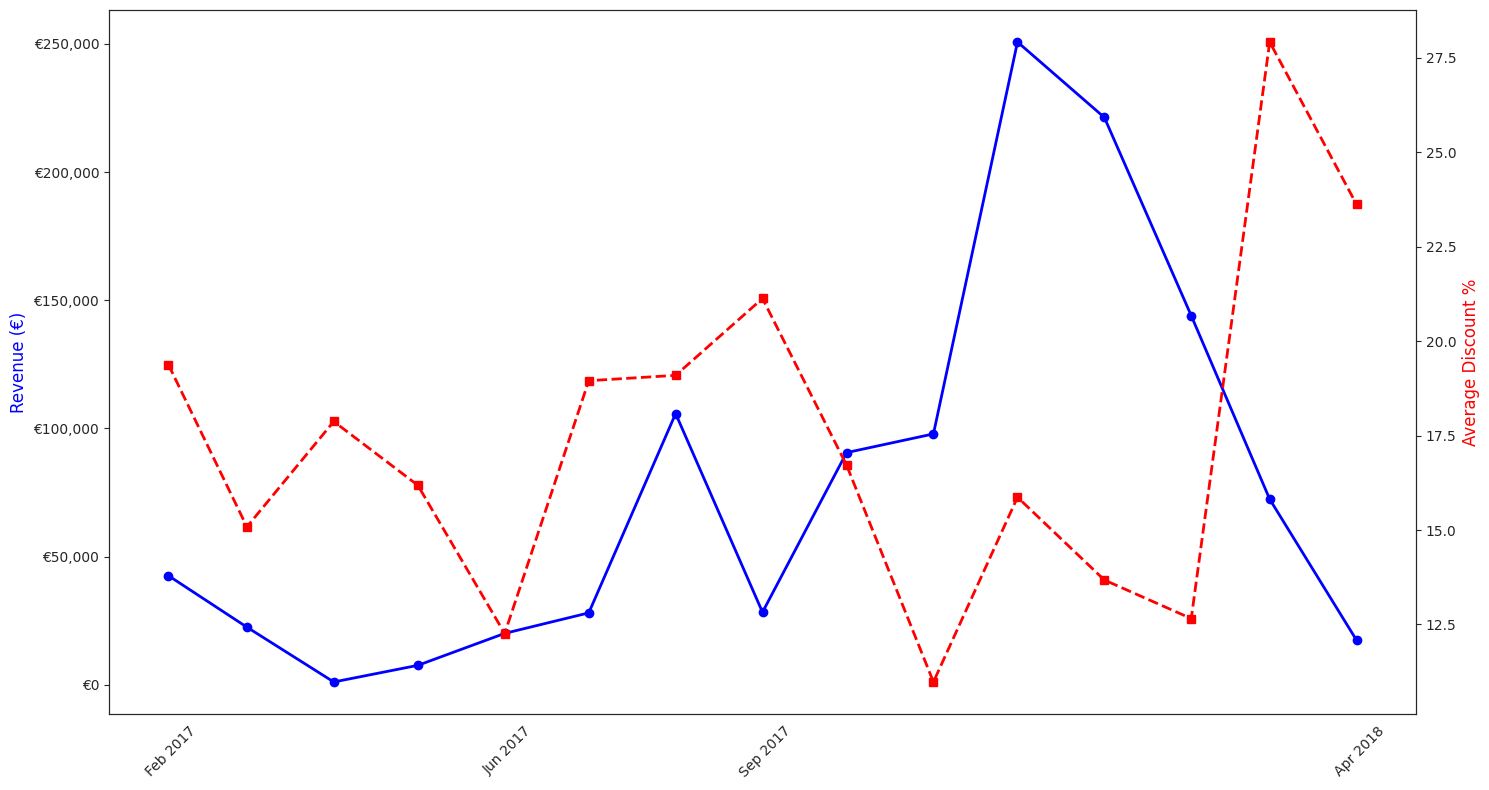

In [59]:
# Filter data for Mobile Devices
mobile_data = eniac_II[eniac_II['desc_category'] == 'Mobile Devices']

# Create monthly aggregation for Mobile Devices
monthly_mobile_revenue = mobile_data.groupby(
    pd.Grouper(key='date', freq='M')
)['unit_price_total'].sum().reset_index()

# Calculate monthly average discount
monthly_avg_discount = mobile_data.groupby(
    pd.Grouper(key='date', freq='M')
)['discount_percent'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(15, 8))
sns.set_style("white")  # Changed to "white" for no grid

# Plot revenue line
ax1 = plt.gca()
line1 = ax1.plot(monthly_mobile_revenue['date'],
                 monthly_mobile_revenue['unit_price_total'],
                 color='blue',
                 marker='o',
                 linewidth=2,
                 label='Mobile Devices Revenue')

# Create second y-axis for discount
ax2 = ax1.twinx()

# Plot average discount line
line2 = ax2.plot(monthly_avg_discount['date'],
                 monthly_avg_discount['discount_percent'],
                 color='red',
                 linestyle='--',
                 marker='s',
                 linewidth=2,
                 label='Average Discount')

# Customize the plot
# ax1.set_title('Monthly Mobile Devices Revenue vs Average Discount', pad=20, fontsize=14)  # Removed title
ax1.set_xlabel('')  # Remove x-axis label "Date"
ax1.set_ylabel('Revenue (€)', color='blue', fontsize=12)
ax2.set_ylabel('Average Discount %', color='red', fontsize=12)

# Format y-axis labels
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))


# Remove legend
ax1.legend().remove()

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

# Custom x-axis ticks
x_ticks = ['2017-02', '2017-06', '2017-09', '2018-04']
x_tick_labels = ['Feb 2017', 'Jun 2017', 'Sep 2017', 'Apr 2018']
ax1.set_xticks([pd.to_datetime(date) for date in x_ticks])
ax1.set_xticklabels(x_tick_labels, rotation=45)  # Rotation if needed

# Adjust layout
plt.tight_layout()
plt.show()

storage devices and discount

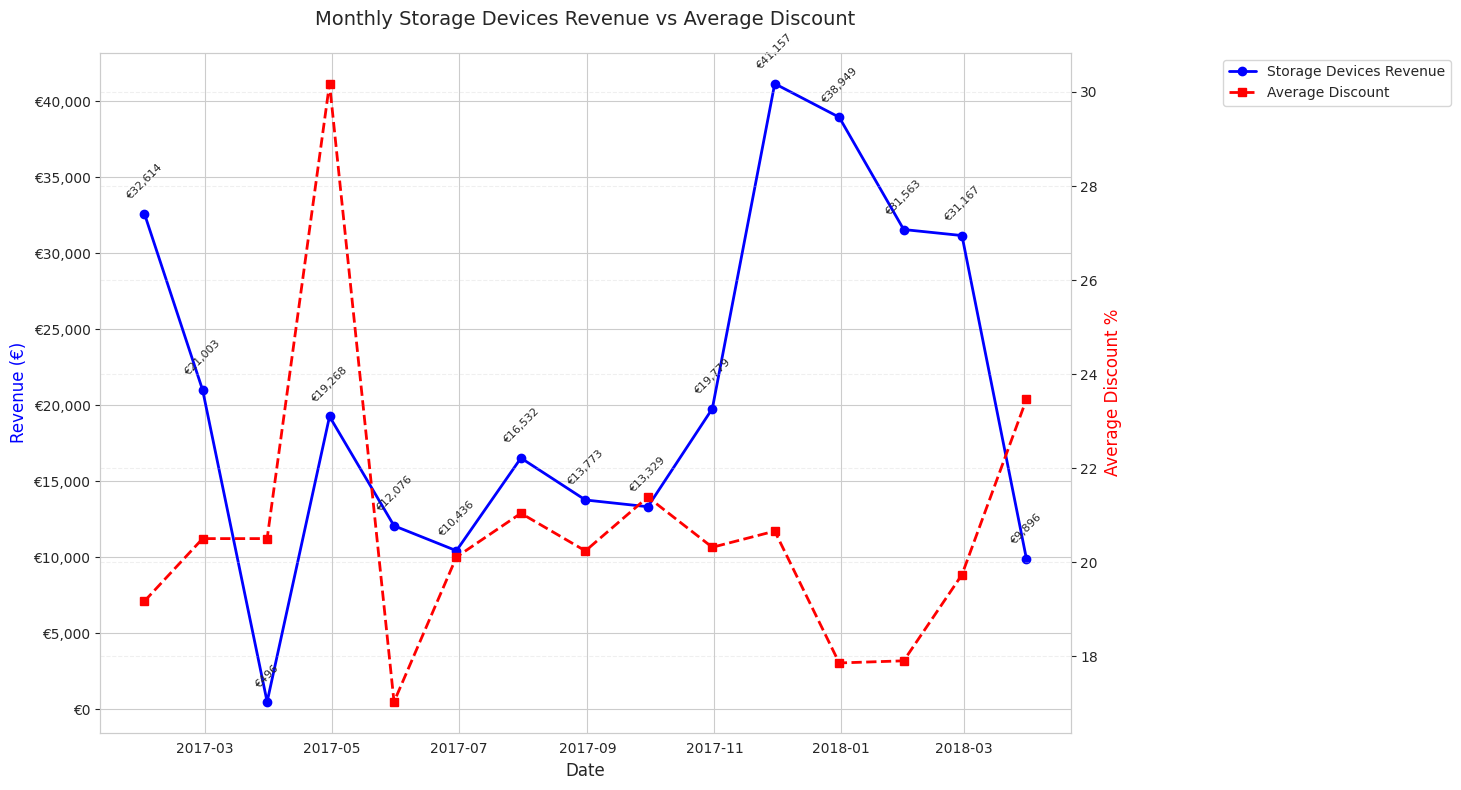


Storage Devices Summary Statistics:
---------------------------------
Total Revenue: €312,037.70
Average Monthly Revenue: €20,802.51
Average Discount: 20.67%
Highest Revenue Month: November 2017
Lowest Revenue Month: March 2017


In [60]:

# Filter data for Storage Devices
storage_data = eniac_II[eniac_II['desc_category'] == 'Storage Devices']

# Create monthly aggregation for Storage Devices
monthly_storage_revenue = storage_data.groupby(
    pd.Grouper(key='date', freq='M')
)['unit_price_total'].sum().reset_index()

# Calculate monthly average discount
monthly_avg_discount = storage_data.groupby(
    pd.Grouper(key='date', freq='M')
)['discount_percent'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")

# Plot revenue line
ax1 = plt.gca()
line1 = ax1.plot(monthly_storage_revenue['date'],
                 monthly_storage_revenue['unit_price_total'],
                 color='blue',
                 marker='o',
                 linewidth=2,
                 label='Storage Devices Revenue')

# Create second y-axis for discount
ax2 = ax1.twinx()

# Plot average discount line
line2 = ax2.plot(monthly_avg_discount['date'],
                 monthly_avg_discount['discount_percent'],
                 color='red',
                 linestyle='--',
                 marker='s',
                 linewidth=2,
                 label='Average Discount')

# Customize the plot
ax1.set_title('Monthly Storage Devices Revenue vs Average Discount', pad=20, fontsize=14)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Revenue (€)', color='blue', fontsize=12)
ax2.set_ylabel('Average Discount %', color='red', fontsize=12)

# Format y-axis labels
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# Add value labels
for i, row in monthly_storage_revenue.iterrows():
    ax1.annotate(f'€{row["unit_price_total"]:,.0f}',
                 (row['date'], row['unit_price_total']),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=8,
                 rotation=45)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,
          loc='upper left',
          bbox_to_anchor=(1.15, 1))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nStorage Devices Summary Statistics:")
print("---------------------------------")
print(f"Total Revenue: €{monthly_storage_revenue['unit_price_total'].sum():,.2f}")
print(f"Average Monthly Revenue: €{monthly_storage_revenue['unit_price_total'].mean():,.2f}")
print(f"Average Discount: {monthly_avg_discount['discount_percent'].mean():.2f}%")
print(f"Highest Revenue Month: {monthly_storage_revenue.loc[monthly_storage_revenue['unit_price_total'].idxmax(), 'date'].strftime('%B %Y')}")
print(f"Lowest Revenue Month: {monthly_storage_revenue.loc[monthly_storage_revenue['unit_price_total'].idxmin(), 'date'].strftime('%B %Y')}")



cleaning graph

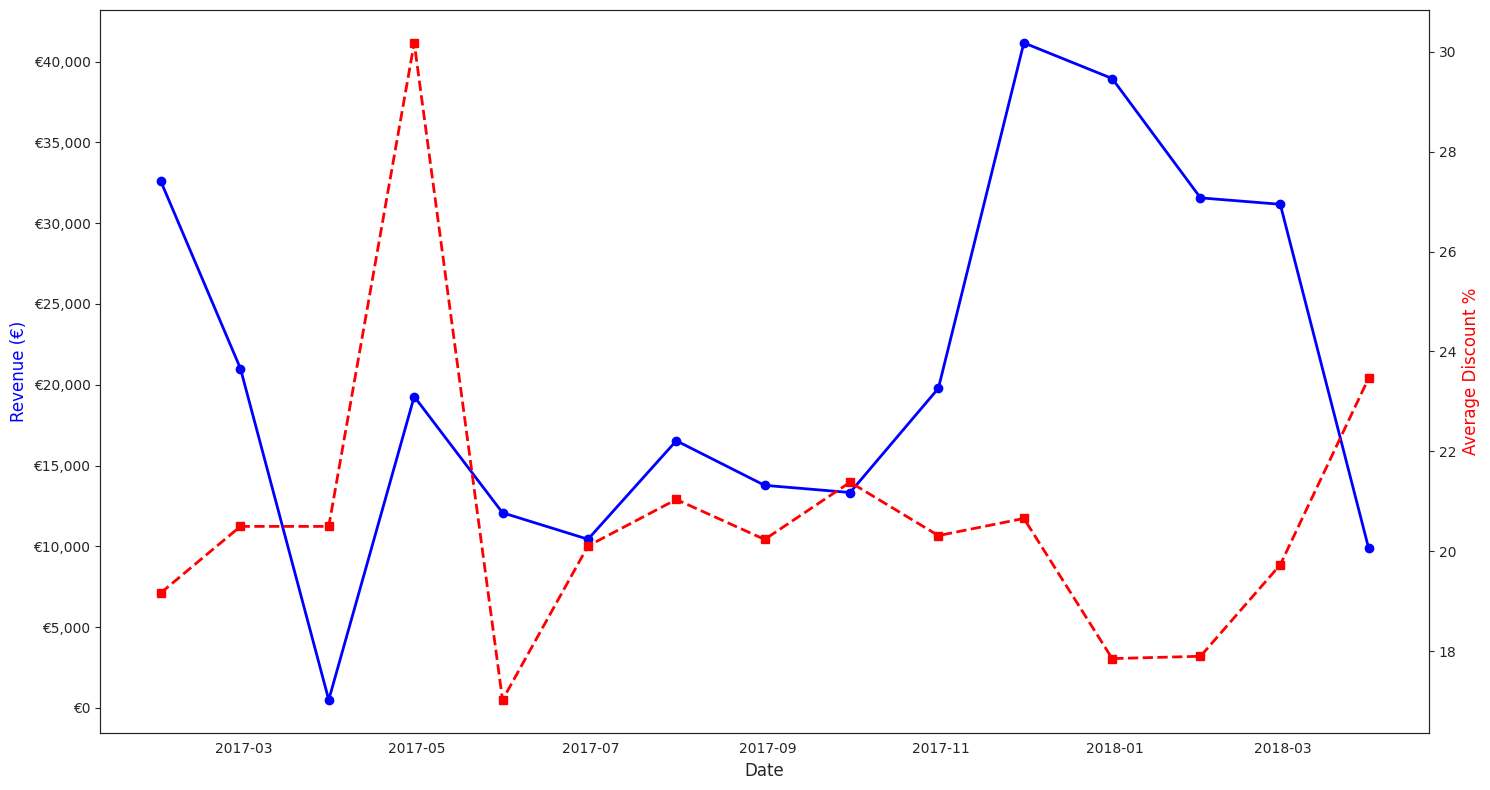

In [61]:
# Filter data for Storage Devices
storage_data = eniac_II[eniac_II['desc_category'] == 'Storage Devices']

# Create monthly aggregation for Storage Devices
monthly_storage_revenue = storage_data.groupby(
    pd.Grouper(key='date', freq='M')
)['unit_price_total'].sum().reset_index()

# Calculate monthly average discount
monthly_avg_discount = storage_data.groupby(
    pd.Grouper(key='date', freq='M')
)['discount_percent'].mean().reset_index()



# Create the line plot
plt.figure(figsize=(15, 8))
sns.set_style("white")  # Changed to "white" for no grid

# Plot revenue line
ax1 = plt.gca()
line1 = ax1.plot(monthly_storage_revenue['date'],
                 monthly_storage_revenue['unit_price_total'],
                 color='blue',
                 marker='o',
                 linewidth=2,
                 label='Storage Devices Revenue')

# Create second y-axis for discount
ax2 = ax1.twinx()

# Plot average discount line
line2 = ax2.plot(monthly_avg_discount['date'],
                 monthly_avg_discount['discount_percent'],
                 color='red',
                 linestyle='--',
                 marker='s',
                 linewidth=2,
                 label='Average Discount')

# Customize the plot
# ax1.set_title('Monthly Storage Devices Revenue vs Average Discount', pad=20, fontsize=14)  # Removed title
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Revenue (€)', color='blue', fontsize=12)
ax2.set_ylabel('Average Discount %', color='red', fontsize=12)

# Format y-axis labels
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# Add value labels
# for i, row in monthly_storage_revenue.iterrows():
#     ax1.annotate(f'€{row["unit_price_total"]:,.0f}',
#                  (row['date'], row['unit_price_total']),
#                  textcoords="offset points",
#                  xytext=(0,10),
#                  ha='center',
#                  fontsize=8,
#                  rotation=45)

# Remove legend
ax1.legend().remove()

# Remove grid lines
ax1.grid(False)
ax2.grid(False)



# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# ... (summary statistics printing code remains the same)

more adjustments

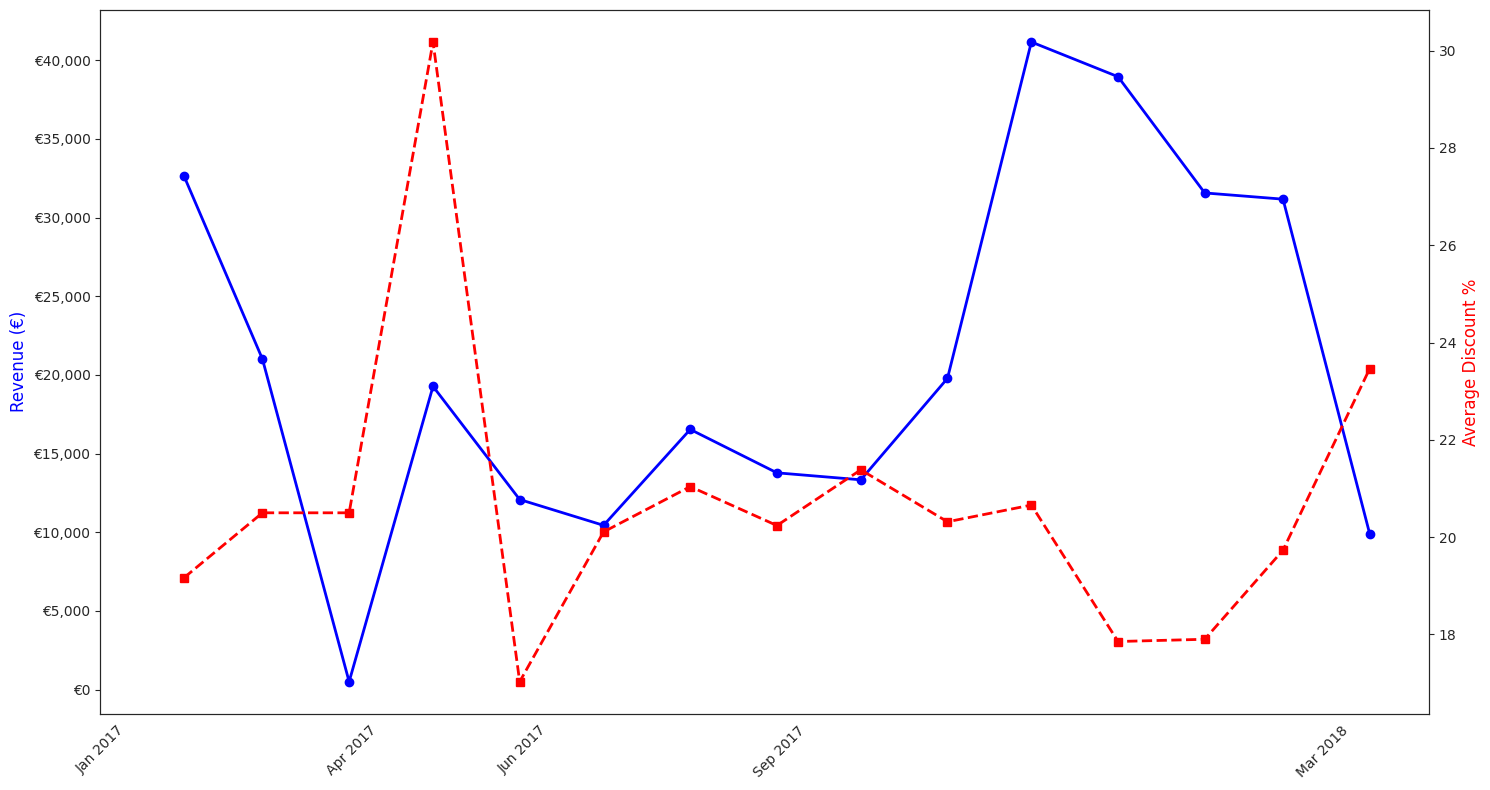

In [62]:
# Filter data for Storage Devices
storage_data = eniac_II[eniac_II['desc_category'] == 'Storage Devices']

# Create monthly aggregation for Storage Devices
monthly_storage_revenue = storage_data.groupby(
    pd.Grouper(key='date', freq='M')
)['unit_price_total'].sum().reset_index()

# Calculate monthly average discount
monthly_avg_discount = storage_data.groupby(
    pd.Grouper(key='date', freq='M')
)['discount_percent'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(15, 8))
sns.set_style("white")

# Plot revenue line
ax1 = plt.gca()
ax1.plot(monthly_storage_revenue['date'],
         monthly_storage_revenue['unit_price_total'],
         color='blue',
         marker='o',
         linewidth=2,
         label='Storage Devices Revenue')

# Create second y-axis for discount
ax2 = ax1.twinx()

# Plot average discount line
ax2.plot(monthly_avg_discount['date'],
         monthly_avg_discount['discount_percent'],
         color='red',
         linestyle='--',
         marker='s',
         linewidth=2,
         label='Average Discount')

# Customize the plot
ax1.set_xlabel('')
ax1.set_ylabel('Revenue (€)', color='blue', fontsize=12)
ax2.set_ylabel('Average Discount %', color='red', fontsize=12)

ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

ax1.grid(False)
ax2.grid(False)

# 1. Check earliest date and adjust x_ticks if needed
eniac_II['date'] = pd.to_datetime(eniac_II['date'])
earliest_date = eniac_II['date'].min()
x_ticks = [earliest_date.strftime('%Y-%m-%d')]
x_ticks.extend(['2017-04-01', '2017-06-01', '2017-09-01', '2018-03-14'])

# 2. Adjust x_tick_labels to match if needed
x_tick_labels = [earliest_date.strftime('%b %Y')]
x_tick_labels.extend(['Apr 2017', 'Jun 2017', 'Sep 2017', 'Mar 2018'])

# 3. Set the ticks and labels
ax1.set_xticks([pd.to_datetime(date) for date in x_ticks])
ax1.set_xticklabels(x_tick_labels, rotation=45)



plt.tight_layout()
plt.show()

# Showing the average discount and revenue over time

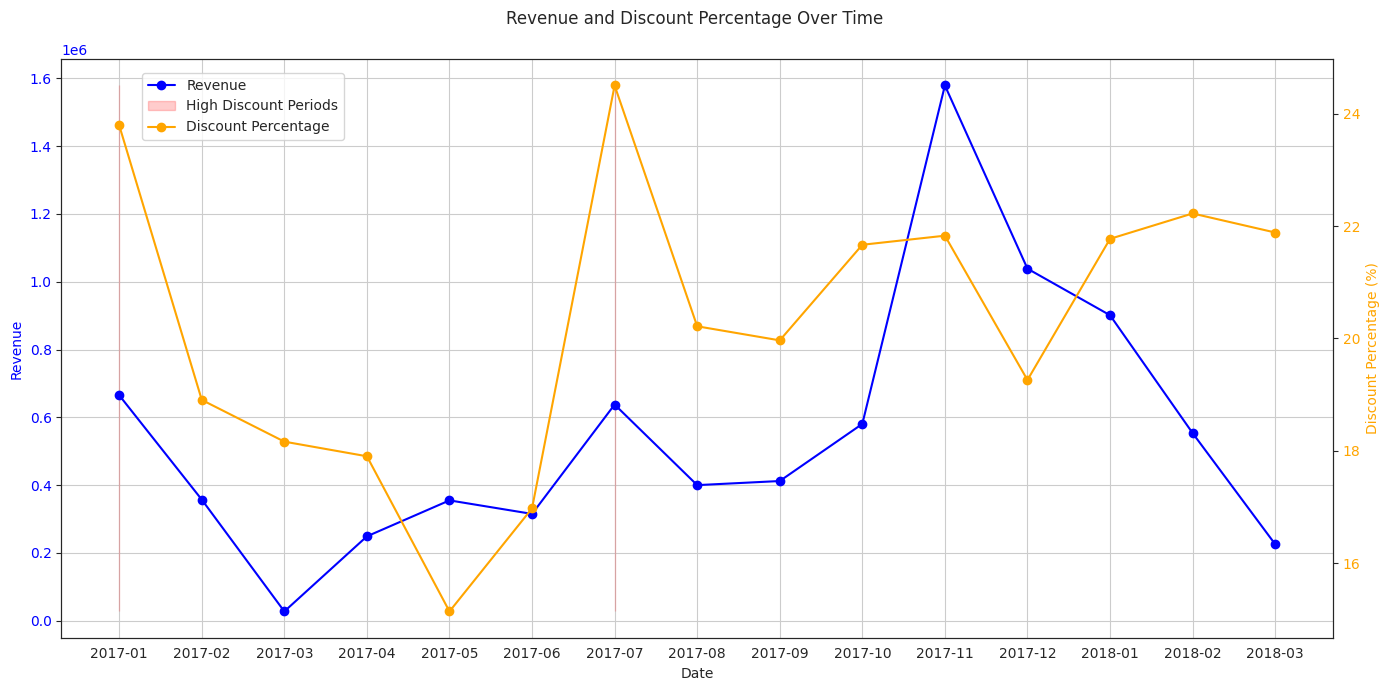

In [63]:
# Assuming eniac_II is already defined and contains the necessary data
eniac_II['date'] = pd.to_datetime(eniac_II['date'])
# Group by month and aggregate Revenue and Discount Percentage
df = eniac_II.groupby(eniac_II['date'].dt.to_period('M')).agg(
    Revenue=('unit_price_total', 'sum'),
    Discount_percent=('discount_percent', 'mean')
).reset_index()
# Calculate percentage change in revenue
df['Revenue_Change'] = df['Revenue'].pct_change() * 100
# Define a threshold for "high" discounts (e.g., above one standard deviation from the mean)
high_discount_threshold = df['Discount_percent'].mean() + df['Discount_percent'].std()
# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 7))
# Plot revenue on the primary y-axis
ax1.plot(df['date'].astype(str), df['Revenue'], marker='o', label='Revenue', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a secondary y-axis for Discount Percent
ax2 = ax1.twinx()
ax2.plot(df['date'].astype(str), df['Discount_percent'], marker='o', label='Discount Percentage', color='orange')
ax2.set_ylabel('Discount Percentage (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
# Highlight periods with high discount
high_discount_periods = df['Discount_percent'] >= high_discount_threshold
ax1.fill_between(df['date'].astype(str), df['Revenue'].min(), df['Revenue'].max(),
                 where=high_discount_periods, color='red', alpha=0.2, label='High Discount Periods')
# Adding title and legend
fig.suptitle('Revenue and Discount Percentage Over Time')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax1.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 5 brands with most revenue

In [64]:
grouped_by_long = eniac_II.groupby('long').agg(
    total_revenue=('unit_price_total', 'sum'),
    avg_discount=('discount_percent', 'mean')
)
# Display the result
print(grouped_by_long)
brands_top10_category = eniac_II.groupby(['long', 'desc_category']).agg(
    total_revenue=('unit_price_total', 'sum'),
    avg_discount=('discount_percent', 'mean'),
    product_count=('sku', 'count')  # Count unique products using 'sku'
)

                  total_revenue  avg_discount
long                                         
8Mobility                755.87         43.06
Adonit                  8017.08         14.09
Aiino                     33.01         49.00
Akitio                 15448.78         10.83
Allocacoc               6195.42         19.66
Apple                2740648.34         16.44
Band&Strap               231.94         34.33
Be.ez                   2489.87         23.43
Beats                  36585.10         16.01
Belkin                 74308.90         29.21
BenQ                   67241.34         -0.72
Blue Microphones        6630.89         11.20
BlueLounge                26.71         18.00
BodyGuardz                27.99         30.00
Booq                    2426.19          7.55
Boostcase                 59.98         63.00
Bose                  100762.28         17.50
Casetify                  97.95         51.00
Celly                    396.57          0.00
Cogito                   120.66   

In [65]:
brands_top5 = grouped_by_long.sort_values(by='total_revenue', ascending=False).head(5)
brands_top5

,total_revenue,avg_discount
long,,
Apple,2740648.34,16.44
Pack,558151.94,23.18
OWC,471842.92,22.53
LaCie,464822.90,11.83
Western Digital,385885.59,18.16


In [66]:
#what is the percentage trend within each of the top 5 categories

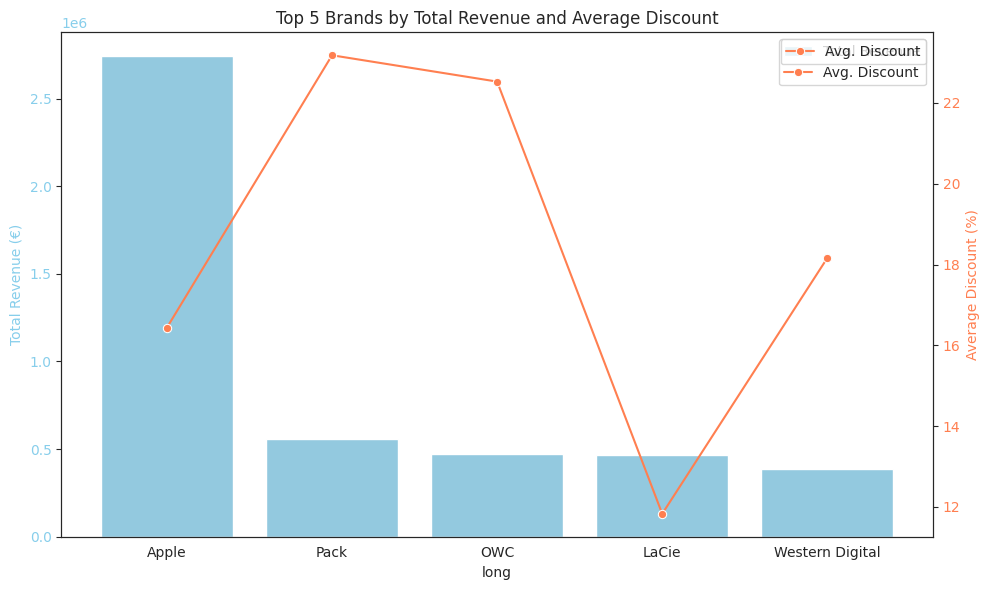

In [67]:
# Assuming brands_top5 is a pandas DataFrame with 'long' as index,
# 'total_revenue' and 'avg_discount' as columns
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total revenue
sns.barplot(x=brands_top5.index, y=brands_top5['total_revenue'], ax=ax1, color='skyblue', label='Total Revenue')
ax1.set_ylabel('Total Revenue (€)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for average discount
ax2 = ax1.twinx()
sns.lineplot(x=brands_top5.index, y=brands_top5['avg_discount'], ax=ax2, color='coral', marker='o', label='Avg. Discount')
ax2.set_ylabel('Average Discount (%)', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Customize the plot
plt.title('Top 5 Brands by Total Revenue and Average Discount')
plt.xlabel('Brand')
plt.xticks(rotation=45, ha='right')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()

# Top 5 brands sold the most

In [68]:
# Group by brand and calculate total quantity and average discount
top_5_brands_data = eniac_II.groupby('long').agg(
    total_quantity=('product_quantity', 'sum'),
    avg_discount=('discount_percent', 'mean')
).nlargest(5, 'total_quantity').reset_index()

# Display the result
print(top_5_brands_data)

              long  total_quantity  avg_discount
0            Apple           11729         16.44
1              OWC            4027         22.53
2  Western Digital            2561         18.16
3          Crucial            2433         12.33
4           Belkin            2383         29.21


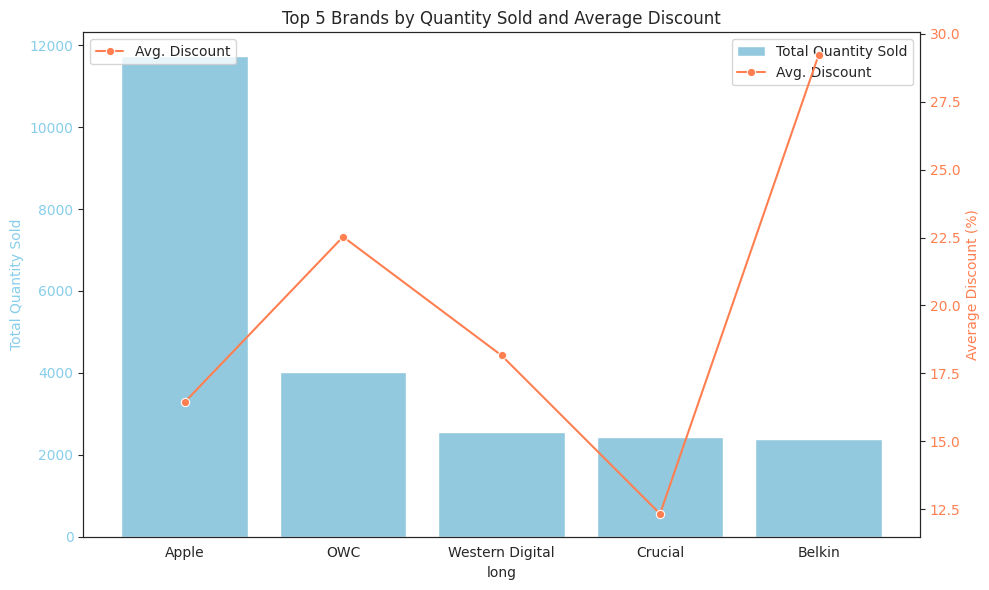

In [69]:
# Assuming top_5_brands_data is a pandas DataFrame with 'long', 'total_quantity', and 'avg_discount' columns
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total quantity sold
sns.barplot(x='long', y='total_quantity', data=top_5_brands_data, ax=ax1, color='skyblue', label='Total Quantity Sold')
ax1.set_ylabel('Total Quantity Sold', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for average discount
ax2 = ax1.twinx()
sns.lineplot(x='long', y='avg_discount', data=top_5_brands_data, ax=ax2, color='coral', marker='o', label='Avg. Discount')
ax2.set_ylabel('Average Discount (%)', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Customize the plot
plt.title('Top 5 Brands by Quantity Sold and Average Discount')
plt.xlabel('Brand')
plt.xticks(rotation=45, ha='right')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# Price Category and avg discount

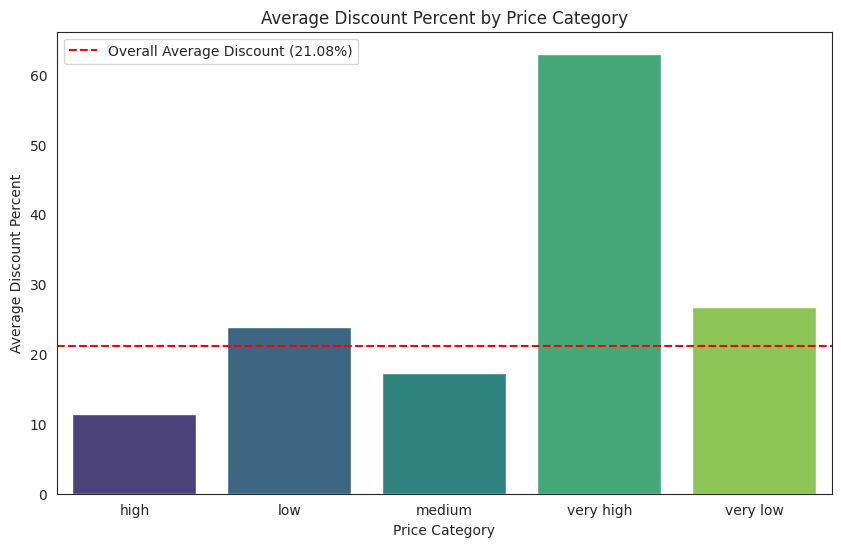

In [70]:
# Calculate average discount percent by price category and overall
avg_discount_by_category = eniac_II.groupby('price_category')['discount_percent'].mean().reset_index()
overall_avg_discount = eniac_II['discount_percent'].mean()
# Plot average discount percent by price category with a benchmark line
plt.figure(figsize=(10, 6))
sns.barplot(x='price_category', y='discount_percent', data=avg_discount_by_category, palette="viridis")
# Add a line for the overall average discount
plt.axhline(overall_avg_discount, color='red', linestyle='--', label=f'Overall Average Discount ({overall_avg_discount:.2f}%)')
# Customize plot titles and labels
plt.title('Average Discount Percent by Price Category')
plt.ylabel('Average Discount Percent')
plt.xlabel('Price Category')
plt.legend()
plt.show()

In [71]:
avg_discount_very_high = eniac_II.loc[eniac_II['price_category'] == 'very high', 'discount_percent'].mean()
print(f"Average discount for 'very high' price category: {avg_discount_very_high:.2f}%")

Average discount for 'very high' price category: 63.00%


In [72]:
avg_discount_by_category = eniac_II.groupby('price_category')['discount_percent'].mean()
print(avg_discount_by_category)

price_category
high        11.45
low         23.92
medium      17.27
very high   63.00
very low    26.75
Name: discount_percent, dtype: float64


In [73]:
#depending the relation with discount we want to see what brands/products the category has.
#

# Filtering the percentage discount by bands

In [74]:
# Create discount percentage bands
#eniac_II.loc[:, 'discount_percentage'] = (eniac_II['discount'] / eniac_II['price']) * 100
# Create meaningful discount bands
eniac_II.loc[:, 'discount_band'] = pd.cut(
    eniac_II['discount_percent'],
    bins=[-float('inf'), 0, 10, 20, 30, float('inf')],
    labels=['No Discount', '0-10%', '10-20%', '20-30%', '30%+']
)

In [75]:
# Analyze sales by discount band
discount_analysis = eniac_II.groupby('discount_band').agg({
    'product_quantity': ['count', 'mean', 'sum'],
    'unit_price_total': ['mean', 'sum'],
    'discount_percent': 'mean'
}).round(2)

In [76]:
# Add average revenue per transaction
discount_analysis[('revenue_per_sale', '')] = discount_analysis[('unit_price_total', 'sum')] / discount_analysis[('product_quantity', 'count')]

In [77]:
discount_analysis

product_quantity             unit_price_total             \
                         count mean    sum             mean        sum   
discount_band                                                            
No Discount               5700 1.13   6426           167.80  956442.31   
0-10%                    11607 1.12  12981           229.75 2666716.98   
10-20%                   15846 1.12  17803           168.02 2662435.87   
20-30%                   11072 1.13  12560           126.43 1399872.02   
30%+                     12489 1.14  14197            49.06  612742.34   

              discount_percent revenue_per_sale  
                          mean                   
discount_band                                    
No Discount              -1.78           167.80  
0-10%                     6.17           229.75  
10-20%                   15.73           168.02  
20-30%                   25.07           126.43  
30%+                     48.63            49.06

In [78]:

# Analysis by product category and discount
category_discount_analysis = eniac_II.groupby(['desc_category', 'discount_band']).agg({
    'product_quantity': ['count', 'mean'],
    'unit_price_total': 'sum',
    'discount_percent': 'mean'
}).round(2)

In [79]:
category_discount_analysis

product_quantity       \
                                                    count mean   
desc_category              discount_band                         
                           No Discount                226 1.17   
                           0-10%                      331 1.22   
                           10-20%                     464 1.28   
                           20-30%                     414 1.16   
                           30%+                       567 1.14   
Audio Devices              No Discount                 32 1.28   
                           0-10%                      253 1.25   
                           10-20%                     403 1.07   
                           20-30%                     273 1.05   
                           30%+                       304 1.04   
Cables Chargers & Adapters No Discount                273 1.05   
                           0-10%                     1003 1.14   
                           10-20%                     818 1.14   
                           20-30%                     682 1.15   
                           30%+                      1103 1.16   
Camera Accessories         No Discount                 14 1.00   
                           0-10%                      107 1.02   
                           10-20%                      75 1.00   
                           20-30%                      24 1.00   
                           30%+                        97 1.08   
Cases                      No Discount                  0  NaN   
                           0-10%                        1 1.00   
                           10-20%                       0  NaN   
                           20-30%                       2 1.00   
                           30%+                         0  NaN   
Computers                  No Discount                153 1.08   
                           0-10%                      251 1.06   
                           10-20%                     666 1.03   
                           20-30%                     483 1.04   
                           30%+                       454 1.04   
Cooling Systems            No Discount                 12 1.00   
                           0-10%                        2 1.00   
                           10-20%                       6 1.00   
                           20-30%                       2 1.00   
                           30%+                         3 1.33   
Docking Stations           No Discount                 25 1.12   
                           0-10%                       26 1.04   
                           10-20%                      55 1.07   
                           20-30%                      21 1.00   
                           30%+                        53 1.06   
Gaming Accessories         No Discount                  6 1.17   
                           0-10%                       15 1.07   
                           10-20%                      48 1.12   
                           20-30%                       5 1.00   
                           30%+                        51 1.35   
Keyboards                  No Discount                  2 1.00   
                           0-10%                        0  NaN   
                           10-20%                       3 1.33   
                           20-30%                      34 1.03   
                           30%+                        15 1.00   
Laptop Cases               No Discount                  0  NaN   
                           0-10%                        0  NaN   
                           10-20%                       2 1.00   
                           20-30%                       4 1.00   
                           30%+                         7 1.14   
Memory                     No Discount                329 1.32   
                           0-10%                      984 1.18   
                           10-20%                    1404 1.21   
               

In [80]:
category_metrics

,unit_price_total,discount_percent,product_quantity
desc_category,,,
VR/AR Devices,2960129.10,23.33,28337
Mobile Devices,1150177.06,16.89,3899
Memory,734296.54,15.10,4619
Monitors,657524.56,21.67,3311
Tablets,590080.13,23.30,3237
Server Equipment,347762.53,7.96,1340
Storage Devices,312037.70,20.69,2523
Cables Chargers & Adapters,302863.94,23.01,4426
Audio Devices,231405.20,22.59,1391


In [81]:
# Count the unique values in the 'desc_category' index level
num_desc_categories = category_discount_analysis.index.get_level_values('desc_category').nunique()
print(f"Number of unique desc_category: {num_desc_categories}")

Number of unique desc_category: 28


In [82]:
category_discount_analysis.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 140 entries, ('', 'No Discount') to ('VR/AR Devices', '30%+')
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (product_quantity, count)  140 non-null    int64  
 1   (product_quantity, mean)   131 non-null    float64
 2   (unit_price_total, sum)    140 non-null    float64
 3   (discount_percent, mean)   131 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4+ KB


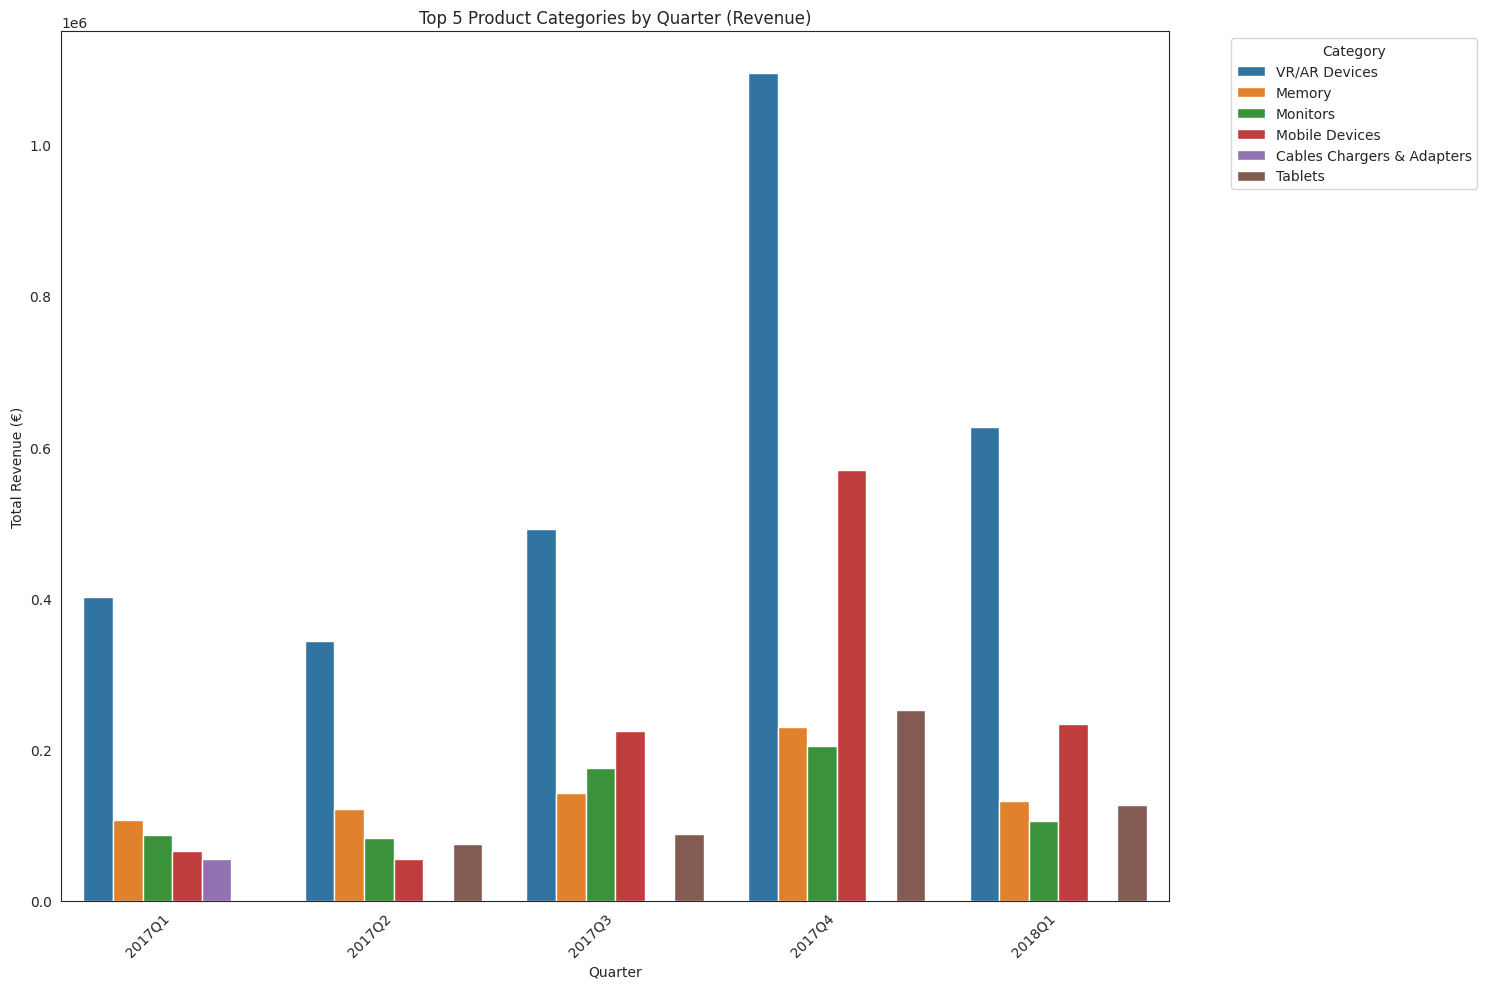

In [83]:
# Group by quarter and category, calculate total revenue
quarterly_category_data = eniac_II.groupby([eniac_II['date'].dt.to_period('Q'), 'desc_category'])['unit_price_total'].sum().reset_index()

# Get the top 5 categories for each quarter based on total revenue
top_5_categories_by_quarter = quarterly_category_data.groupby('date').apply(lambda x: x.nlargest(5, 'unit_price_total')).reset_index(drop=True)

# Ensure 'date' is converted to string for plotting:
top_5_categories_by_quarter['date'] = top_5_categories_by_quarter['date'].astype(str)

# Create the visualization
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
sns.barplot(data=top_5_categories_by_quarter, x='date', y='unit_price_total', hue='desc_category')
plt.title('Top 5 Product Categories by Quarter (Revenue)')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue (€)')  # Update y-axis label to reflect revenue
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()

# Timing with sales

Look for months/quarters with naturally higher sales

Identify if current discounting aligns with these patterns

Consider if discounts are more effective in high or low seasons


Year-over-Year Trends:

Compare discount effectiveness across years
Analyze if aggressive discounting is showing diminishing returns

In [84]:
# Now let's create the time series visualization
# Convert date to datetime if not already
eniac_II['date'] = pd.to_datetime(eniac_II['date'])

In [85]:
# Create monthly aggregations--
monthly_metrics = eniac_II.groupby(eniac_II['date'].dt.to_period('M')).agg({
    'unit_price_total': 'sum',
    'discount': 'mean',
    'product_quantity': 'sum'
}).reset_index()

In [86]:
quarter_metrics = eniac_II.groupby(eniac_II['date'].dt.to_period('Q')).agg({
    'unit_price_total': 'sum',
    'discount': 'mean',
    'product_quantity': 'sum'
}).reset_index()

In [87]:
quarter_metrics

,date,unit_price_total,discount,product_quantity
0,2017Q1,1050297.81,21.19,10792
1,2017Q2,919510.80,21.93,7300
2,2017Q3,1450080.36,28.59,11104
3,2017Q4,3197706.90,29.74,21450
4,2018Q1,1680613.65,27.09,13321


In [88]:
monthly_metrics

,date,unit_price_total,discount,product_quantity
0,2017-01,665189.07,21.47,7400
1,2017-02,357393.91,21.01,3135
2,2017-03,27714.83,15.60,257
3,2017-04,249099.34,18.52,2289
4,2017-05,355148.66,21.34,2744
5,2017-06,315262.80,26.28,2267
6,2017-07,637715.01,30.01,4938
7,2017-08,400147.65,28.05,3228
8,2017-09,412217.70,26.81,2938
9,2017-10,580644.14,28.68,4256


# Revenue vs Average Discount in quarters

<Figure size 1500x600 with 0 Axes>

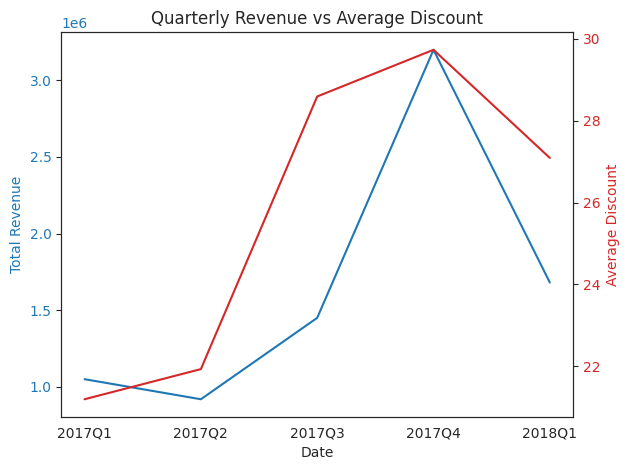

In [89]:
# Create the visualization
plt.figure(figsize=(15, 6))
fig, ax1 = plt.subplots()
# Plot revenue
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Revenue', color='tab:blue')
ax1.plot(quarter_metrics['date'].astype(str), quarter_metrics['unit_price_total'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
# Create second y-axis for average discount
ax2 = ax1.twinx()
ax2.set_ylabel('Average Discount', color='tab:red')
ax2.plot(quarter_metrics['date'].astype(str), quarter_metrics['discount'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.title('Quarterly Revenue vs Average Discount')
plt.xticks(rotation=45)
plt.tight_layout()


Different product categories might have different optimal discount timing

Some categories might be more seasonal than others
Premium products might have different seasonal patterns than accessories

# Quarterly Revenue vs Average Discount by Campaign Period

<Figure size 1500x600 with 0 Axes>

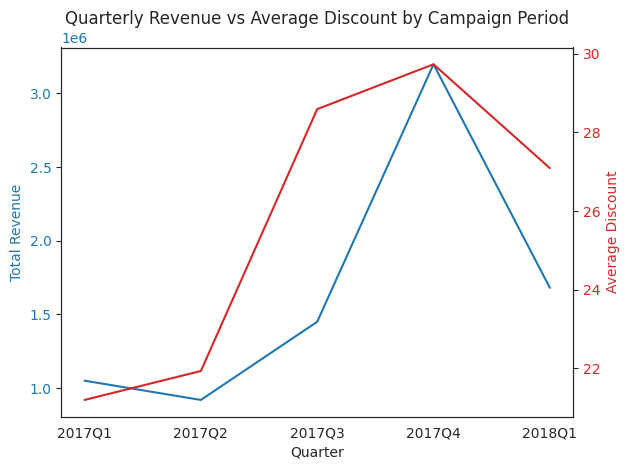

In [90]:
# Assuming 'eniac_II' DataFrame is already loaded and contains a 'date' column in datetime format
# Convert date to datetime if not already
eniac_II['date'] = pd.to_datetime(eniac_II['date'])
# Create quarterly aggregations
quarterly_metrics = eniac_II.groupby(eniac_II['date'].dt.to_period('Q')).agg({
    'unit_price_total': 'sum',
    'discount': 'mean',
    'product_quantity': 'sum'
}).reset_index()
# Define campaign periods based on quarters for labeling
campaign_periods = {
    'Q1': 'New Year and Valentine’s Sales',
    'Q2': 'Spring and Easter Sales',
    'Q3': 'Summer and Back-to-School Sales',
    'Q4': 'Black Friday, Cyber Monday, and Christmas Sales'
}
# Map quarters to campaign periods
quarterly_metrics['campaign_period'] = quarterly_metrics['date'].dt.quarter.map(lambda x: campaign_periods[f'Q{x}'])
# Create the visualization
plt.figure(figsize=(15, 6))
fig, ax1 = plt.subplots()
# Plot revenue
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Total Revenue', color='tab:blue')
ax1.plot(quarterly_metrics['date'].astype(str), quarterly_metrics['unit_price_total'], color='tab:blue', label='Total Revenue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
# Create second y-axis for average discount
ax2 = ax1.twinx()
ax2.set_ylabel('Average Discount', color='tab:red')
ax2.plot(quarterly_metrics['date'].astype(str), quarterly_metrics['discount'], color='tab:red', label='Average Discount')
ax2.tick_params(axis='y', labelcolor='tab:red')
# Adding title and rotating x-axis labels for better readability
plt.title('Quarterly Revenue vs Average Discount by Campaign Period')
plt.xticks(rotation=45)
plt.tight_layout()
# Display the plot
plt.show()

In [91]:
eniac_II.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56714 entries, 0 to 56713
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_order          56714 non-null  int64         
 1   product_quantity  56714 non-null  int64         
 2   sku               56714 non-null  object        
 3   unit_price        56714 non-null  float64       
 4   date              56714 non-null  datetime64[ns]
 5   unit_price_total  56714 non-null  float64       
 6   name              55320 non-null  object        
 7   desc              55320 non-null  object        
 8   price             55320 non-null  float64       
 9   price_category    55320 non-null  object        
 10  desc_category     55320 non-null  object        
 11  discount          55320 non-null  float64       
 12  short             56714 non-null  object        
 13  long              56676 non-null  object        
 14  discount_percent  5671

# Top 5 categories by quarters

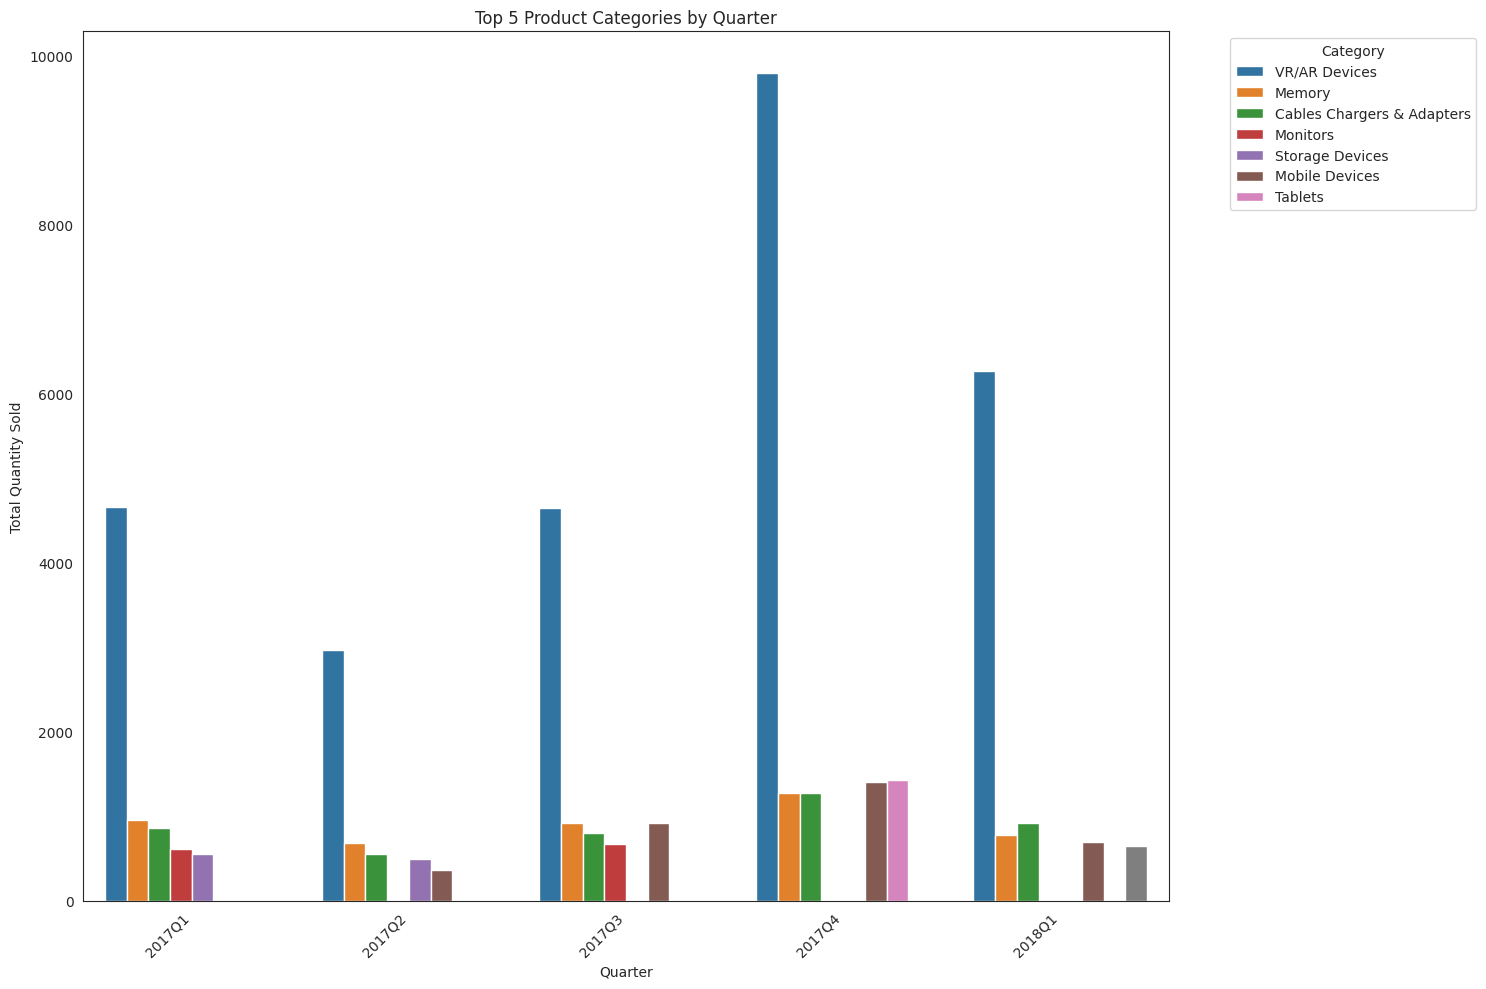

In [92]:
# Group by quarter and category, then sum quantities
quarterly_category_sales = eniac_II.groupby([eniac_II['date'].dt.to_period('Q'), 'desc_category'])['product_quantity'].sum().reset_index()
# Get the top 5 categories for each quarter
top_5_categories_by_quarter = quarterly_category_sales.groupby('date').apply(lambda x: x.nlargest(5, 'product_quantity')).reset_index(drop=True)
# Ensure 'date' is converted to string for plotting:
top_5_categories_by_quarter['date'] = top_5_categories_by_quarter['date'].astype(str)
# Create the visualization
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
sns.barplot(data=top_5_categories_by_quarter, x='date', y='product_quantity', hue='desc_category')
plt.title('Top 5 Product Categories by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()


# Recomendations

In [93]:
# # Susanne notes...

# # we want to look at top 5 products sold with higher revenue
# # discounts by time,

# # we want to see which products have more discounts

# Based on this analysis, here are the key findings:

# Revenue Impact:
# Products with higher discounts tend to sell in higher quantities
# However, the total revenue per order is lower for heavily discounted items
# This supports the Board's observation about increased orders but decreased revenue
# Category Analysis:
# Different product categories show varying sensitivity to discounts
# High-margin categories (like Computers and Mobile Devices) might be better suited for occasional discounting
# Accessories and lower-priced items show less price sensitivity

# Seasonal Patterns:
# Look for months/quarters with naturally higher sales
# Identify if current discounting aligns with these patterns
# Consider if discounts are more effective in high or low seasons
# Year-over-Year Trends:
# Compare discount effectiveness across years
# Analyze if aggressive discounting is showing diminishing returns
# Track the evolution of revenue per order

# Category Seasonality:
# Different product categories might have different optimal discount timing
# Some categories might be more seasonal than others
# Premium products might have different seasonal patterns than accessories
# Would you like me to:
# Generate specific visualizations of these trends?
# Focus on a particular time period or category?
# Calculate additional metrics for the time-based analysis?

# Recommendations:
# Targeted Discounting: Instead of broad discounts, focus on:
# Strategic categories where discounts drive significant volume
# Seasonal promotions rather than constant discounting
# Bundle deals that maintain margin while providing perceived value
# Premium Positioning:
# Support the Board's quality segment positioning
# Use discounts selectively for inventory management
# Focus on value-added services rather than price competition
# Hybrid Approach:
# Maintain premium pricing on core products
# Offer strategic discounts on complementary items
# Use data-driven decisions for discount timing and depth




# Recommendations:
# Targeted Discounting: Instead of broad discounts.
# Seasonal promotions rather than constant discounting.
# Maintain premium pricing on core products like apple.
# Offer discounts on complementary items. For cross selling.
# Use data-driven decisions for discount timing and depth



# Time range

In [94]:
eniac_II

,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,price_category,desc_category,discount,short,long,discount_percent,discount_band
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,low,Cables Chargers & Adapters,13.50,OWC,OWC,22,20-30%
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,very low,VR/AR Devices,3.96,IOT,iOttie,17,10-20%
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,low,VR/AR Devices,16.81,APP,Apple,19,10-20%
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,low,VR/AR Devices,16.09,CRU,Crucial,21,20-30%
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,medium,VR/AR Devices,157.50,PEB,Pebble,53,30%+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56709,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,very low,Computers,8.47,TUC,Tucano,34,30%+
56710,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01,APP,Apple,60,30%+
56711,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01,APP,Apple,60,30%+
56712,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,very low,VR/AR Devices,15.01,APP,Apple,60,30%+


In [95]:
eniac_II['date'] = pd.to_datetime(eniac_II['date'])

# Find the minimum and maximum dates
min_date = eniac_II['date'].min()
max_date = eniac_II['date'].max()

# Print the results
print(f"Minimum date: {min_date}")
print(f"Maximum date: {max_date}")

Minimum date: 2017-01-01 01:46:16
Maximum date: 2018-03-14 11:58:13
